In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Đề tài: Dự Đoán Khách Hàng Tiềm Năng Mua Sắm Dựa Trên Dữ Liệu Giao Dịch và Hồ Sơ Khách Hàng**




**Mục tiêu**: Đề tài này nhằm dự đoán khả năng mua sắm của khách hàng dựa trên các dữ liệu giao dịch và hồ sơ khách hàng. Bằng cách phân tích các yếu tố ảnh hưởng đến hành vi mua sắm của khách hàng, chúng tôi mong muốn xác định các khách hàng tiềm năng, tối ưu hóa chiến lược tiếp thị và nâng cao hiệu quả của các chiến dịch tiếp thị.
- Phương pháp phân tích
1.	Tiền Xử Lý Dữ Liệu:

  o	Làm sạch dữ liệu, xử lý dữ liệu thiếu, và chuyển đổi các thuộc tính cần thiết (như tuổi từ năm sinh).

  o	Mã hóa các biến phân loại (như trình độ học vấn, tình trạng hôn nhân).
2.	Khám Phá Dữ Liệu:

  o	Phân tích mô tả để hiểu phân phối của các thuộc tính và các mối quan hệ giữa các yếu tố khác nhau.
  
  o	Khám phá sự phân bố của chi tiêu, tần suất mua hàng và các yếu tố khác có thể ảnh hưởng đến hành vi mua sắm.
3. Xây dựng mô hình phân cụm khách hàng: K-Means
- Kết quả mong đợi:

  Danh Sách Khách Hàng Tiềm Năng: Xác định và phân loại khách hàng có khả năng mua sắm cao để tập trung vào các chiến dịch tiếp thị.
- Ứng dụng: Kết quả từ nghiên cứu này có thể được áp dụng để tối ưu hóa chiến lược tiếp thị của công ty, cải thiện tỷ lệ thành công của các chiến dịch tiếp thị và tăng cường sự hài lòng của khách hàng.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score,precision_score


In [3]:
data=pd.read_csv('/content/drive/MyDrive/PhanTichDuLieu2/customer_segmentation.csv')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


•	**ID Khách Hàng:** Mã định danh duy nhất cho mỗi khách hàng.

•	**Year_Birth:** Năm sinh của khách hàng, từ đó tính toán tuổi.

•	**Education:** Trình độ học vấn của khách hàng.

•	**Marital_Status:** Tình trạng hôn nhân của khách hàng.

•	**Income:** Thu nhập hàng năm của khách hàng.

•	**Kidhome:** Số lượng trẻ em trong hộ gia đình.

•	**Teenhome:** Số lượng thanh thiếu niên trong hộ gia đình.

•	**Dt_Customer:** Ngày khách hàng được ghi nhận vào cơ sở dữ liệu.

•	**Recency:** Số ngày kể từ lần giao dịch cuối cùng của khách hàng.

•	**MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds:** Số tiền chi tiêu cho các loại sản phẩm khác nhau.

•	**NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases:** Số lượng giao dịch qua các kênh khác nhau.

•	**NumWebVisitsMonth:** Số lượt truy cập vào website mỗi tháng.

•	**AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5:** Chỉ số cho biết khách hàng có chấp nhận các chiến dịch tiếp thị cụ thể không.

•	**Complain:** Chỉ số cho biết khách hàng có khiếu nại hay không.

•	**Z_CostContact, Z_Revenue:** Chi phí liên hệ và doanh thu từ các chiến dịch tiếp thị.

•	**Response:** Chỉ số cho biết khách hàng có phản hồi lại chiến dịch tiếp thị không.


##Exploratory Data Analysis (EDA)

In [4]:
data.shape

(2240, 29)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Checking missing values

In [6]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [8]:
# for col in data.columns:
#   if len(data[col].unique())>1:
#     print(col)
#     # print(data[col].unique())
#     print(data[col].unique().min())
#     print(data[col].unique().max())

**- Trình độ học vấn**
1. Basic: Trình độ cơ bản, thường là trình độ phổ thông (tiểu học, trung học).
2. 2nd Cycle: Trình độ trung cấp hoặc trình độ cao đẳng, tương đương với trình độ sau phổ thông nhưng chưa đạt đến đại học.
3. Graduation: Trình độ tốt nghiệp đại học (cử nhân).
4. Master: Trình độ thạc sĩ, là cấp học sau đại học.
5. PhD: Trình độ tiến sĩ, cấp học cao nhất trong các bậc học.

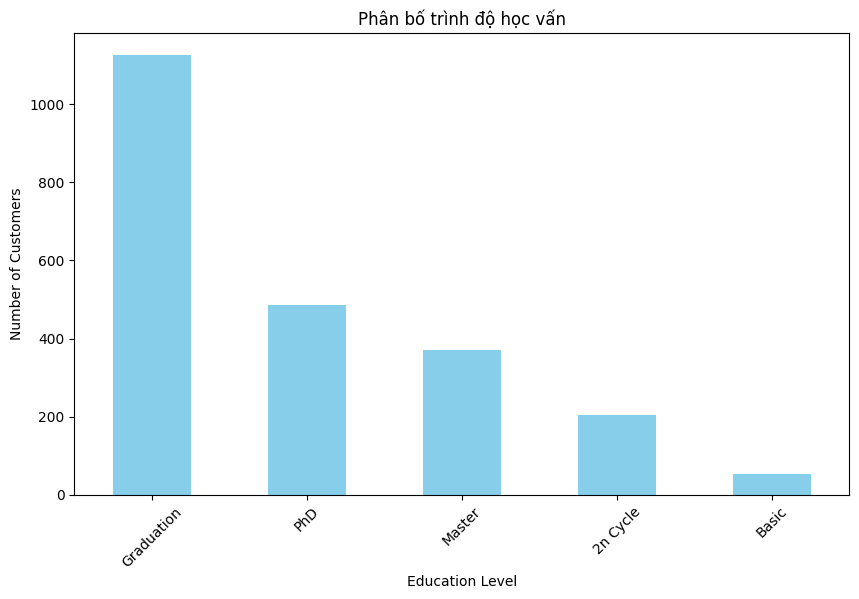

In [9]:
#Xem trình độ học vấn của Khách hàng
plt.figure(figsize=(10,6))
data['Education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Phân bố trình độ học vấn')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.ylabel('Number of Customers')
plt.show()

##Xem độ tuổi khách hàng

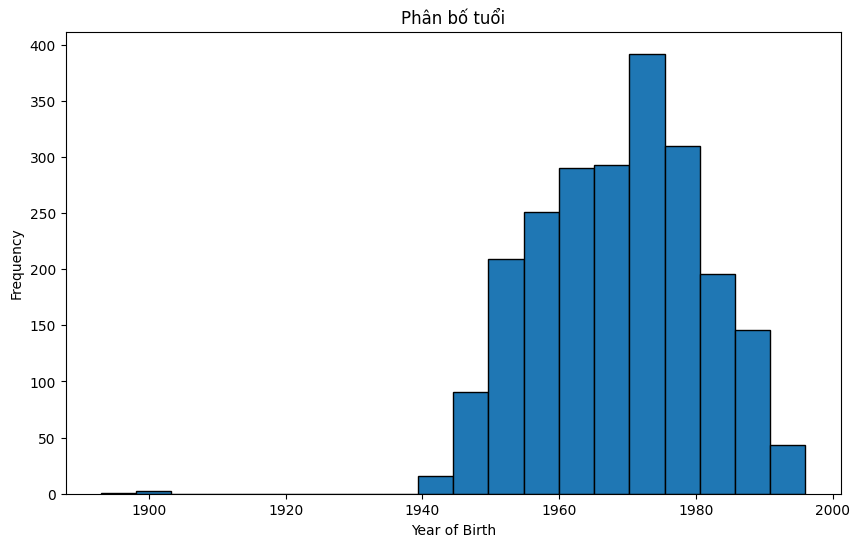

In [10]:
plt.figure(figsize=(10,6))
data['Year_Birth'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Phân bố tuổi')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.show()

##Xem sản phẩm nào được mua nhiều nhất

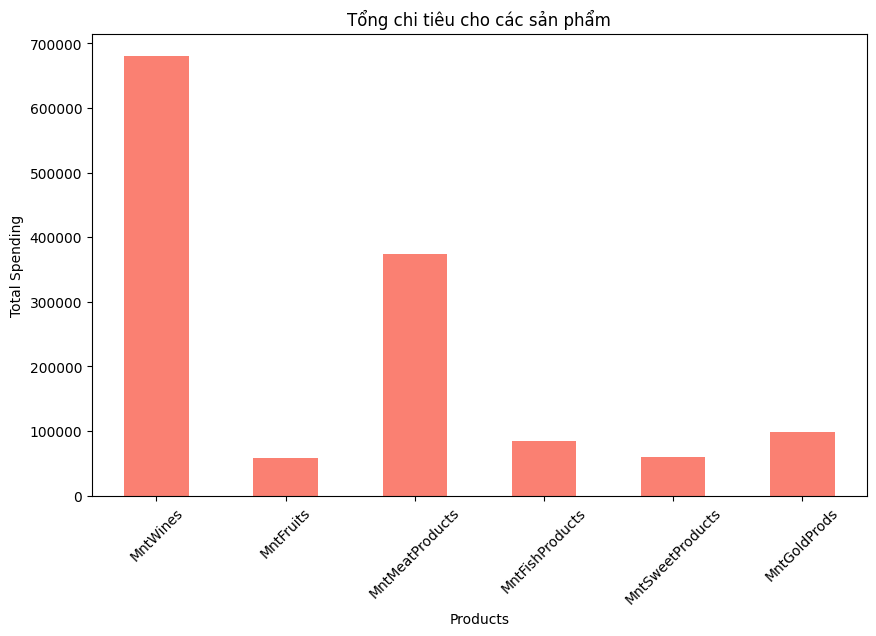

In [11]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spent = data[products].sum()
plt.figure(figsize=(10,6))
total_spent.plot(kind='bar', color='salmon')
plt.title('Tổng chi tiêu cho các sản phẩm')
plt.xlabel('Products')
plt.xticks(rotation=45)
plt.ylabel('Total Spending')
plt.show()

##Tỷ lệ chi tiêu cho sản phẩm khác nhau như thế nào giữa các nhóm tuổi?

<ipython-input-12-cef2fbbf9bf3>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_by_age = data.groupby('Age_Group')[products].mean()


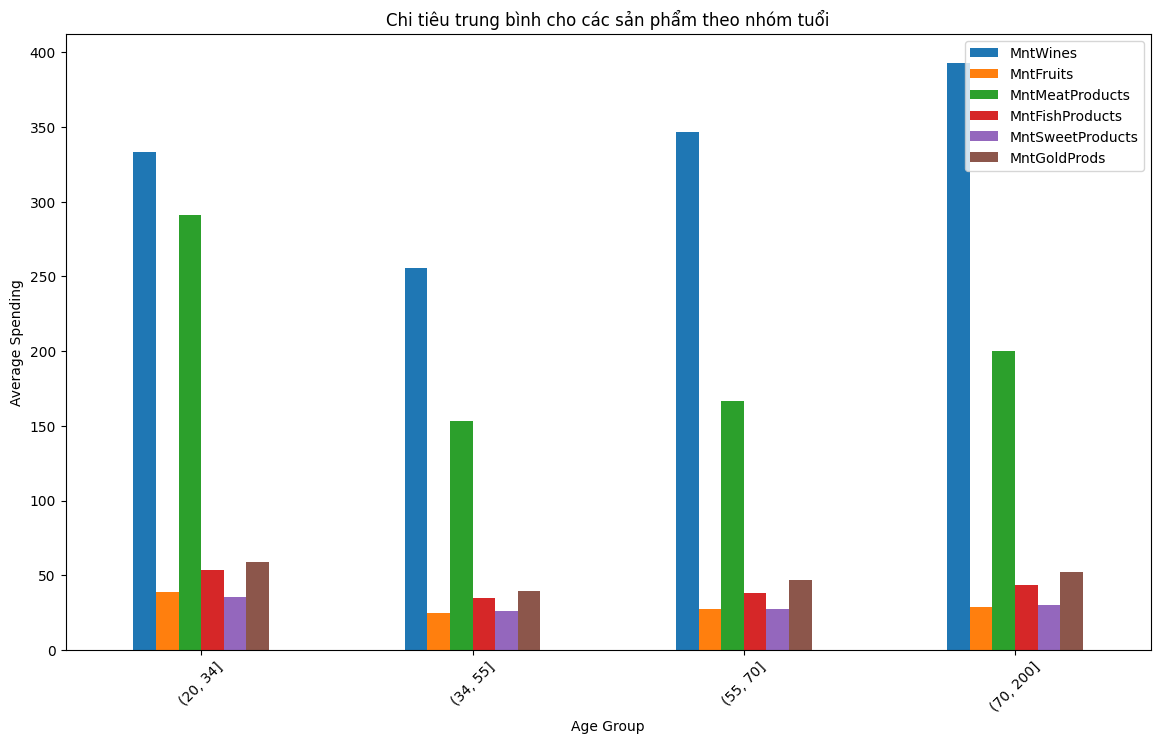

In [12]:
data['Age'] = 2024 - data['Year_Birth']
age_bins = [20, 34, 55,70,200]
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins)

spending_by_age = data.groupby('Age_Group')[products].mean()
spending_by_age.plot(kind='bar', figsize=(14,8))
plt.title('Chi tiêu trung bình cho các sản phẩm theo nhóm tuổi')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylabel('Average Spending')
plt.show()

In [13]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,67,"(55, 70]"
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,70,"(55, 70]"
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,59,"(55, 70]"
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,40,"(34, 55]"
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,43,"(34, 55]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,57,"(55, 70]"
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,78,"(70, 200]"
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,43,"(34, 55]"
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,68,"(55, 70]"


##Sự khác biệt về mức chi tiêu giữa khách hàng đã kết hôn và khách hàng độc thân

**- Tình trạng hôn nhân**
1. Single: Độc thân, không đang trong mối quan hệ hôn nhân.
2. Together: Sống chung nhưng chưa kết hôn, có thể đang ở trong một mối quan hệ tình cảm hoặc chung sống không đăng ký hôn nhân.
3. Married: Đã kết hôn, đang trong một mối quan hệ hôn nhân chính thức.
4. Divorced: Đã ly hôn, từng kết hôn nhưng hiện tại đã chấm dứt mối quan hệ hôn nhân.
5. Widow: Goá, mất đi người bạn đời do người đó đã qua đời.
6. Alone: Sống một mình, có thể không có hoặc không duy trì mối quan hệ tình cảm nào.
7. Absurd: Không phải là tình trạng hôn nhân chính thức; có thể mang nghĩa "phi lý" hoặc không có ý nghĩa cụ thể trong bối cảnh tình trạng hôn nhân.
8. YOLO: Không phải là tình trạng hôn nhân chính thức; "YOLO" (You Only Live Once - Bạn chỉ sống một lần) thể hiện tinh thần sống tự do, có thể không tuân theo các chuẩn mực hôn nhân hoặc tình cảm truyền thống.

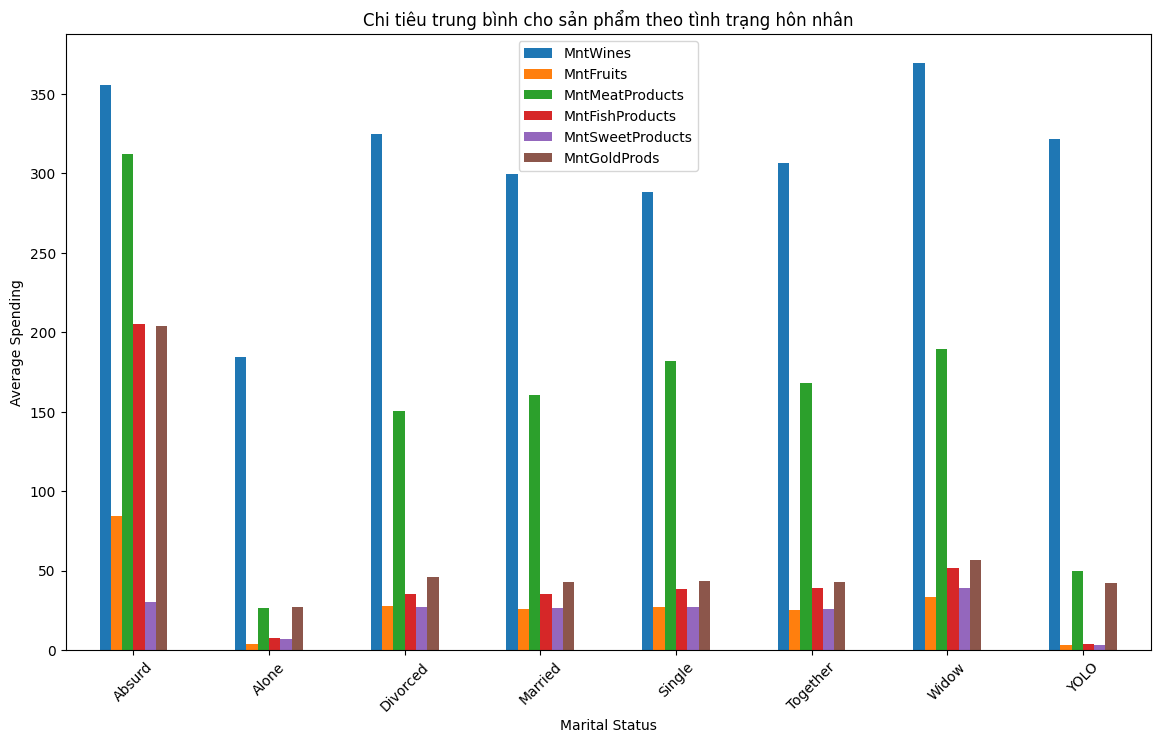

In [14]:
spending_by_marital_status = data.groupby('Marital_Status')[products].mean()
spending_by_marital_status.plot(kind='bar', figsize=(14,8))
plt.title('Chi tiêu trung bình cho sản phẩm theo tình trạng hôn nhân')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.ylabel('Average Spending')
plt.show()

##Tỷ lệ mua hàng trực tuyến có khác với mua hàng tại cửa hàng không?

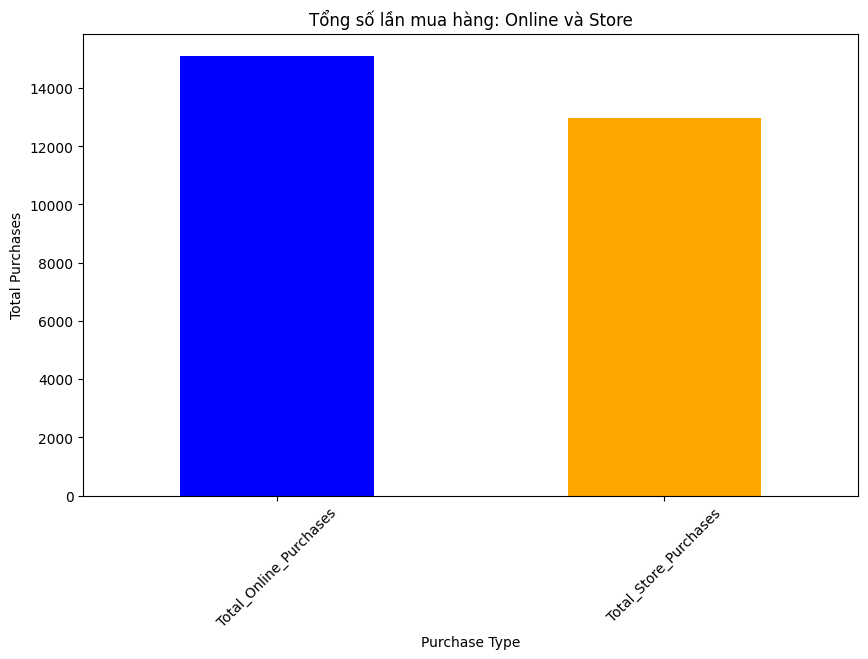

In [15]:
data['Total_Online_Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases']
data['Total_Store_Purchases'] = data['NumStorePurchases']

online_vs_store = data[['Total_Online_Purchases', 'Total_Store_Purchases']].sum()
plt.figure(figsize=(10,6))
online_vs_store.plot(kind='bar', color=['blue', 'orange'])
plt.title('Tổng số lần mua hàng: Online và Store')
plt.xlabel('Purchase Type')
plt.xticks(rotation=45)
plt.ylabel('Total Purchases')
plt.show()

##Mối quan hệ nào giữa thu nhập của khách hàng và số lượng mua hàng trực tuyến

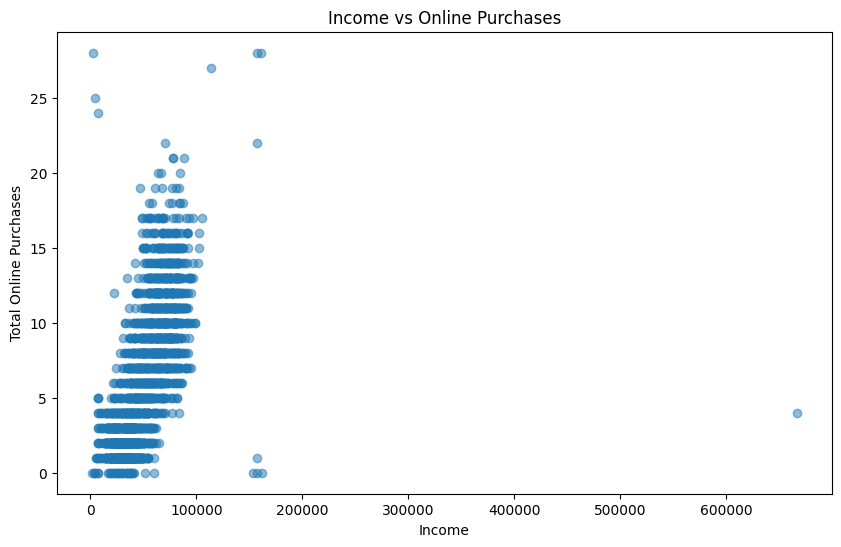

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(data['Income'], data['Total_Online_Purchases'], alpha=0.5)
plt.title('Income vs Online Purchases')
plt.xlabel('Income')
plt.ylabel('Total Online Purchases')
plt.show()

##Mối quan hệ giữa độ tuổi và số lượt truy cập hàng tháng vào trang web


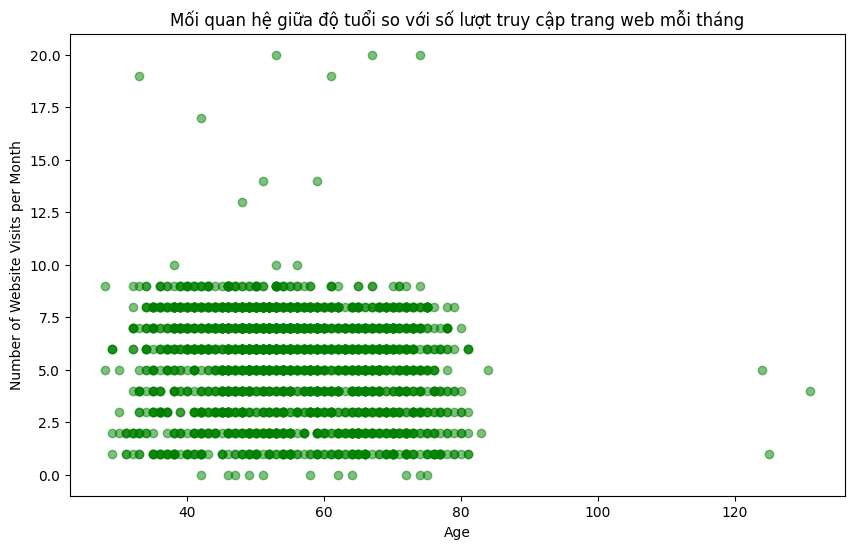

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(data['Age'], data['NumWebVisitsMonth'], alpha=0.5, color='green')
plt.title('Mối quan hệ giữa độ tuổi so với số lượt truy cập trang web mỗi tháng')
plt.xlabel('Age')
plt.ylabel('Number of Website Visits per Month')
plt.show()

##**Tỷ lệ chấp nhận các chiến dịch (cmp) cho từng nhóm tuổi.**

<ipython-input-18-541ed9552b93>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_by_age_group = data.groupby('Age_Group')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean()


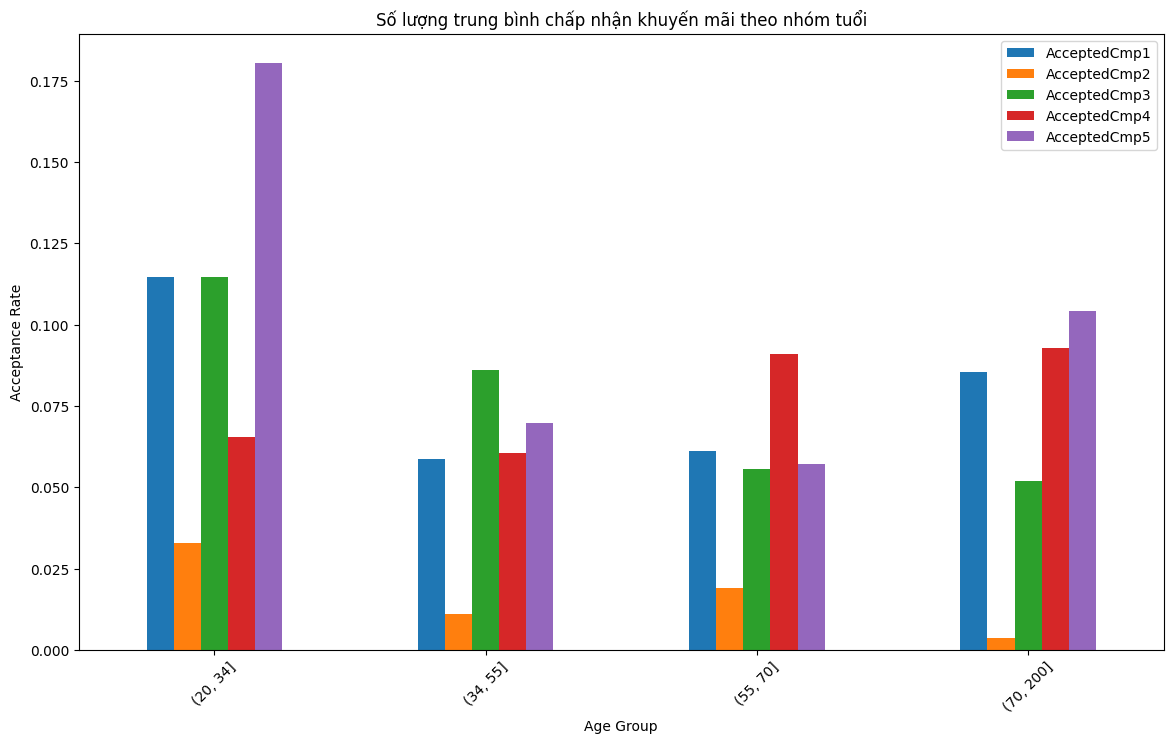

In [18]:
response_by_age_group = data.groupby('Age_Group')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean()
response_by_age_group.plot(kind='bar', figsize=(14,8))
plt.title('Số lượng trung bình chấp nhận khuyến mãi theo nhóm tuổi')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylabel('Acceptance Rate')
plt.show()

# Tiền xử lý

In [19]:
data.drop(['ID','Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [20]:
#Tính số ngày mỗi khách hàng đã gắn bó với công ty
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'],format='%d-%m-%Y')
data['Dt_Customer']=data['Dt_Customer'].max()-data['Dt_Customer']
data['Dt_Customer']=data['Dt_Customer'].dt.days
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Group,Total_Online_Purchases,Total_Store_Purchases
0,1957,Graduation,Single,58138.0,0,0,663,58,635,88,...,0,0,0,0,0,1,67,"(55, 70]",18,4
1,1954,Graduation,Single,46344.0,1,1,113,38,11,1,...,0,0,0,0,0,0,70,"(55, 70]",2,2
2,1965,Graduation,Together,71613.0,0,0,312,26,426,49,...,0,0,0,0,0,0,59,"(55, 70]",10,10
3,1984,Graduation,Together,26646.0,1,0,139,26,11,4,...,0,0,0,0,0,0,40,"(34, 55]",2,4
4,1981,PhD,Married,58293.0,1,0,161,94,173,43,...,0,0,0,0,0,0,43,"(34, 55]",8,6


In [21]:
# Đếm các giá trị trong các cột phân loại
categorical_columns = data.select_dtypes('object')

for column in categorical_columns:
    value_counts = data[column].value_counts()
    print(value_counts)
    print("\n")

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64




In [22]:
#Chuẩn hóa 'Marital_Status' thành 2 nhóm
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'], 'Partner')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

In [23]:
#Chuẩn hóa 'Education' thành 3 nhóm
data['Education'] = data['Education'].replace(['PhD', 'Master'], 'Postgraduate')
data['Education'] = data['Education'].replace(['2n Cycle', 'Graduation'], 'Graduate')
data['Education'] = data['Education'].replace(['Basic'], 'Undergraduate')


In [24]:
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(data[column].unique())
    print("\n")

Unique values in Education:
['Graduate' 'Postgraduate' 'Undergraduate']


Unique values in Marital_Status:
['Single' 'Partner']




In [25]:
# Combining columns together to reduce the number of dimensions
data['Kids'] = data['Kidhome'] + data['Teenhome']
data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data['TotalNumPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

In [26]:
data['Year_Birth']=2024-data['Year_Birth']

In [27]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Age_Group',
       'Total_Online_Purchases', 'Total_Store_Purchases', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'TotalNumPurchases'],
      dtype='object')

In [28]:
df=data.copy()

In [29]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,Response,Age,Age_Group,Total_Online_Purchases,Total_Store_Purchases,Kids,Expenses,TotalAcceptedCmp,TotalNumPurchases
0,67,Graduate,Single,58138.0,0,0,663,58,635,88,...,0,1,67,"(55, 70]",18,4,0,1617,0,25
1,70,Graduate,Single,46344.0,1,1,113,38,11,1,...,0,0,70,"(55, 70]",2,2,2,27,0,6
2,59,Graduate,Partner,71613.0,0,0,312,26,426,49,...,0,0,59,"(55, 70]",10,10,0,776,0,21
3,40,Graduate,Partner,26646.0,1,0,139,26,11,4,...,0,0,40,"(34, 55]",2,4,1,53,0,8
4,43,Postgraduate,Partner,58293.0,1,0,161,94,173,43,...,0,0,43,"(34, 55]",8,6,1,422,0,19


In [30]:
df = df[['Year_Birth','Education', 'Marital_Status', 'Income', 'Kids', 'Dt_Customer',
         'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp', 'Complain', 'Response']]

In [31]:
df.drop_duplicates(inplace=True)

df.dropna(inplace=True)

df.shape

(2031, 12)

In [32]:
# Phân loại nhóm tuổi
def assign_age_group(age):
    if age < 18:
        return 'Under 18'
    elif age < 35:
        return 'Young Adults'
    elif age < 55:
        return 'Middle-Aged Adults'
    else:
        return 'Elders'
df['Age_Group'] = df['Year_Birth'].apply(assign_age_group)

In [33]:
df.drop('Year_Birth',axis=1,inplace=True)

In [34]:
df

,Education,Marital_Status,Income,Kids,Dt_Customer,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Age_Group
0,Graduate,Single,58138.0,0,663,58,1617,25,0,0,1,Elders
1,Graduate,Single,46344.0,2,113,38,27,6,0,0,0,Elders
2,Graduate,Partner,71613.0,0,312,26,776,21,0,0,0,Elders
3,Graduate,Partner,26646.0,1,139,26,53,8,0,0,0,Middle-Aged Adults
4,Postgraduate,Partner,58293.0,1,161,94,422,19,0,0,0,Middle-Aged Adults
...,...,...,...,...,...,...,...,...,...,...,...,...
2233,Graduate,Partner,666666.0,1,392,23,62,11,0,0,0,Middle-Aged Adults
2235,Graduate,Partner,61223.0,1,381,46,1341,18,0,0,0,Elders
2237,Graduate,Single,56981.0,0,155,91,1241,19,1,0,0,Middle-Aged Adults
2238,Postgraduate,Partner,69245.0,1,156,8,843,23,0,0,0,Elders


In [35]:
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
categorical_columns = [col for col in df.columns if 2 < df[col].nunique() < 10]
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns if col not in binary_columns + categorical_columns]
print('Biến nhị phân:', binary_columns)
print('Biến phân loại:', categorical_columns)
print('Biến số:', numerical_columns)

Biến nhị phân: ['Marital_Status', 'Complain', 'Response']
Biến phân loại: ['Education', 'Kids', 'TotalAcceptedCmp', 'Age_Group']
Biến số: ['Income', 'Dt_Customer', 'Recency', 'Expenses', 'TotalNumPurchases']


In [36]:
# Vẽ Boxplot xem Ouliers
def boxplot(data,column):
  colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']
  fig,ax=plt.subplots(1,5,figsize=(20,8))
  for i,col in enumerate(numerical_columns):
    sns.boxplot(y=data[col], ax=ax[i],color=colors[i])
    ax[i].set_xlabel(col)
  plt.tight_layout()
  plt.show()

In [37]:
#Xóa những dòng là Ouliers
def xuLiOutlier(data,column):
  q1=data[column].quantile(0.25)
  q3=data[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  df_filter=data[(data[column]>=lower_bound)&(data[column]<=upper_bound)]
  return df_filter
df=xuLiOutlier(df,numerical_columns[0])
for i in range(1,len(numerical_columns)):
  df=xuLiOutlier(df,numerical_columns[i])

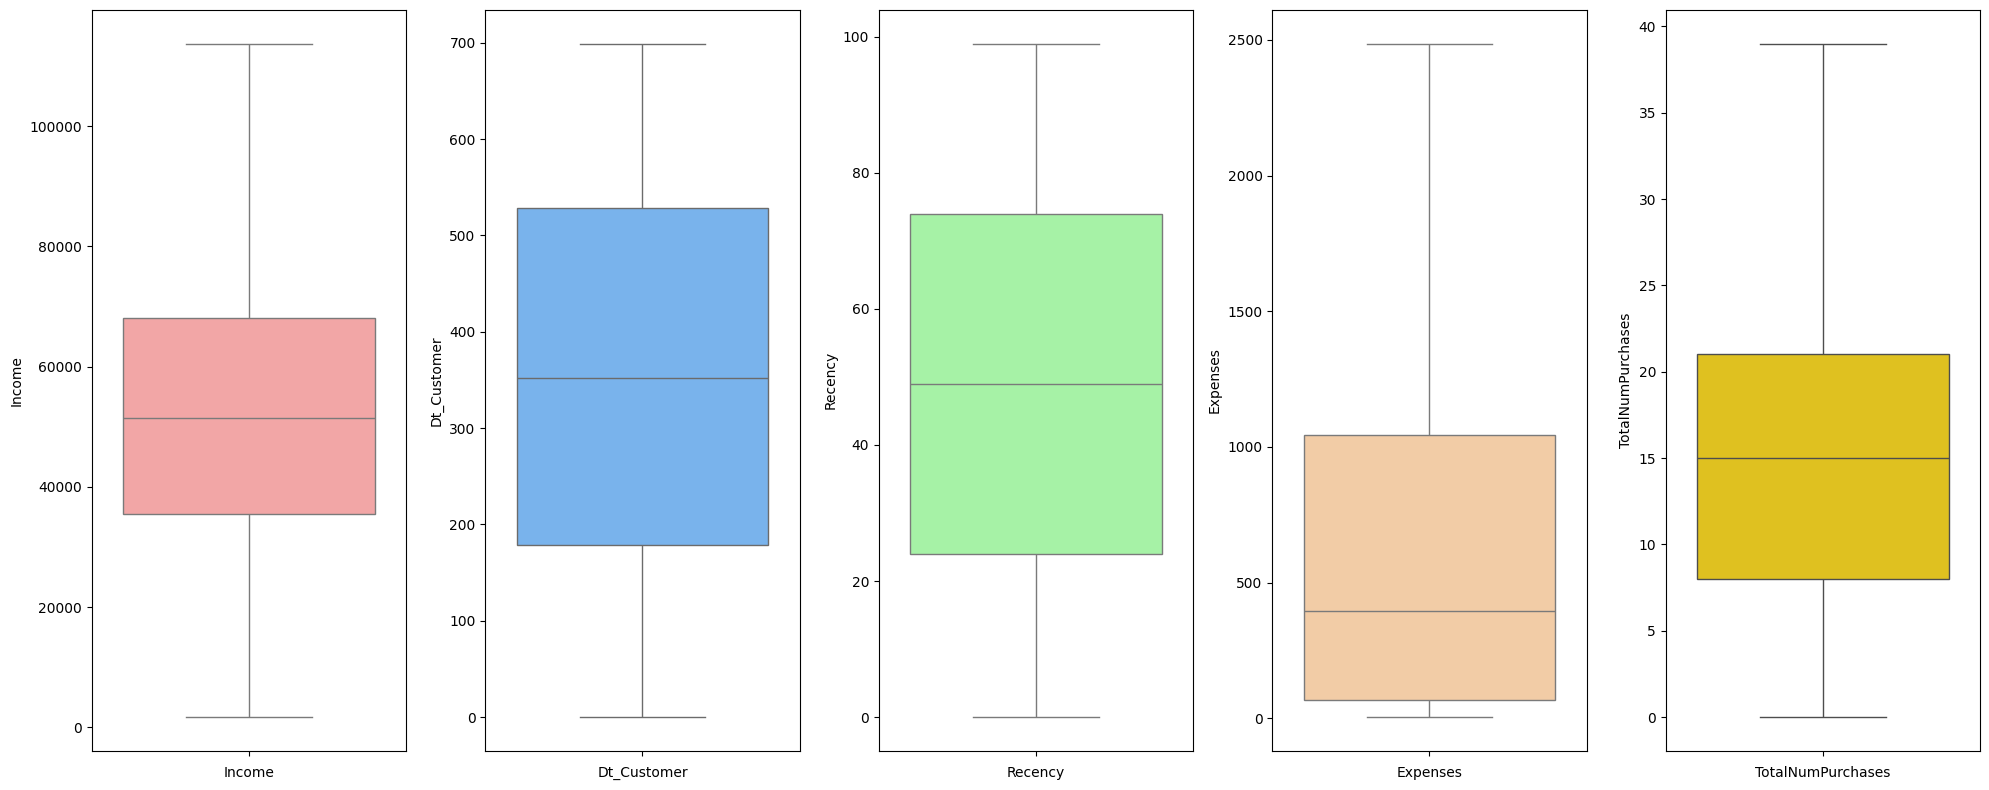

In [38]:
boxplot(df,numerical_columns)

In [39]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Dt_Customer',
       'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp',
       'Complain', 'Response', 'Age_Group'],
      dtype='object')

In [40]:
df=df[['Age_Group','Education', 'Marital_Status', 'Income', 'Kids', 'Dt_Customer',
       'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp',
       'Complain', 'Response']]
df.head()

,Age_Group,Education,Marital_Status,Income,Kids,Dt_Customer,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response
0,Elders,Graduate,Single,58138.0,0,663,58,1617,25,0,0,1
1,Elders,Graduate,Single,46344.0,2,113,38,27,6,0,0,0
2,Elders,Graduate,Partner,71613.0,0,312,26,776,21,0,0,0
3,Middle-Aged Adults,Graduate,Partner,26646.0,1,139,26,53,8,0,0,0
4,Middle-Aged Adults,Postgraduate,Partner,58293.0,1,161,94,422,19,0,0,0


In [41]:
df.shape

(2019, 12)

In [42]:
# for col in df.columns:
#   if len(df[col].unique())>1:
#     print(col)
#     # print(df[col].unique())
#     print(df[col].unique().min())
#     print(df[col].unique().max())

In [43]:
# df.to_csv('customer_segmentation_clean.csv',index=False)

##Data Analysis

In [44]:
import warnings
warnings.filterwarnings("ignore")

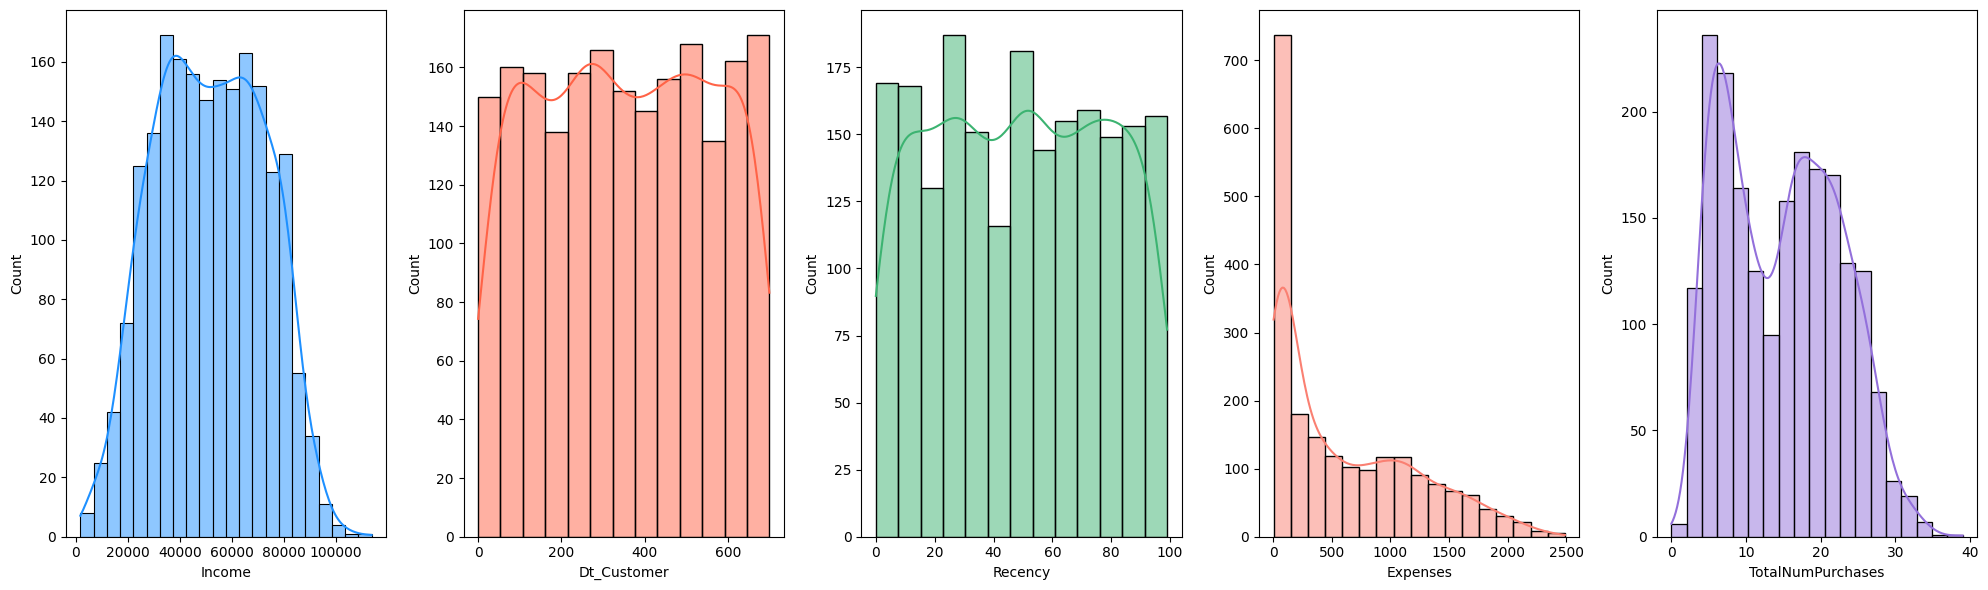

In [45]:
#Vẽ histogram xem phân phối dữ liệu
colors = ["dodgerblue", "tomato", "mediumseagreen", "salmon", "mediumpurple"]


fig, ax = plt.subplots(1, 5, figsize=(20, 6))
i = 0
for col in numerical_columns:
    sns.histplot(data=df, x=col, kde=True, ax=ax[i], color=colors[i])
    i += 1
plt.tight_layout()
plt.show()


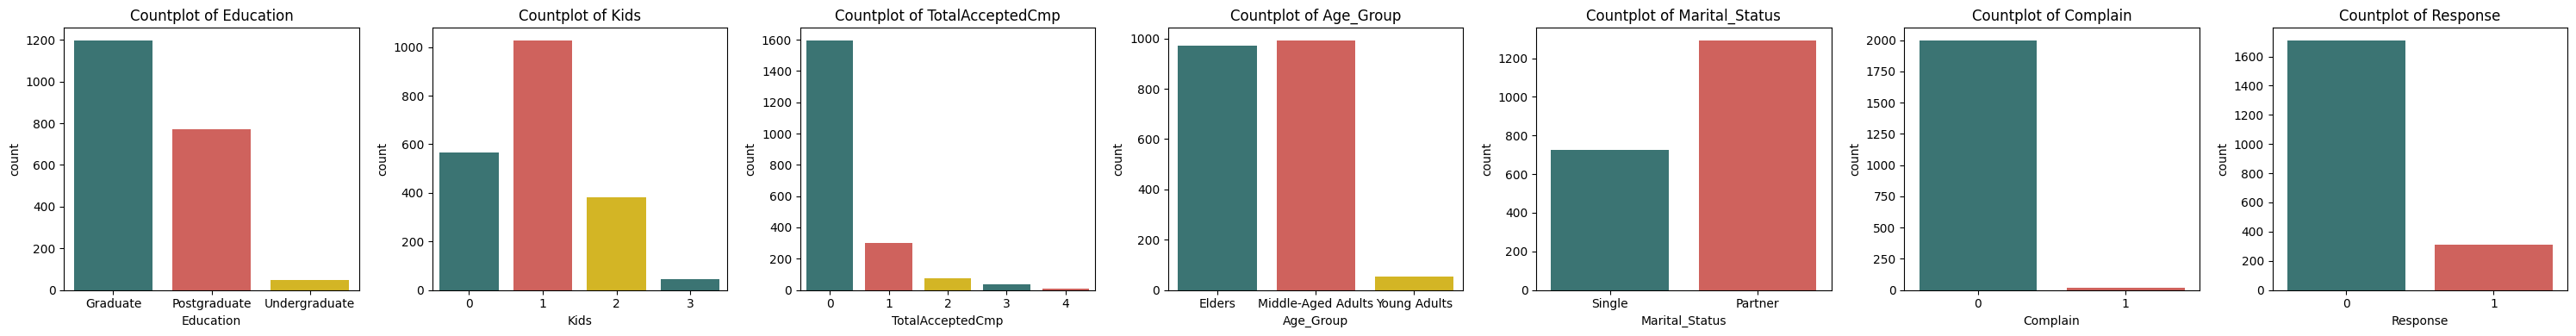

In [46]:
# Define the color palette
custom_palette = ["#327D7C", "#E2504A", "#F0C808"]
num_columns = len(categorical_columns + binary_columns)

fig, ax = plt.subplots(1, num_columns, figsize=(30, 4))

i = 0
for col in categorical_columns + binary_columns:
    sns.countplot(data=df, x=col, ax=ax[i], palette=custom_palette,legend=False)
    ax[i].set_title(f'Countplot of {col}')
    i += 1

plt.tight_layout()
plt.show()


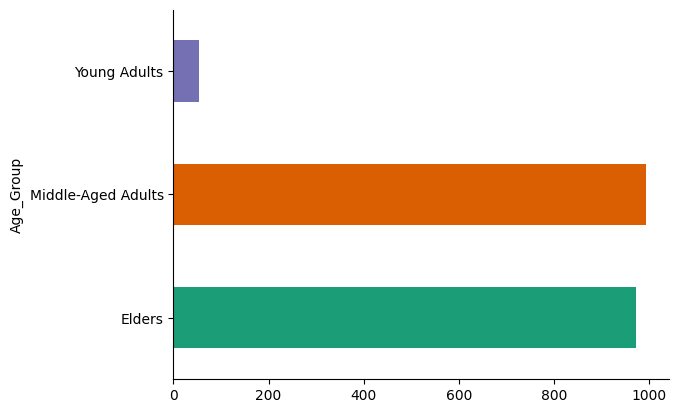

In [47]:
# Vẽ biểu đồ phân bố dữ liệu theo nhóm tuổi
df.groupby('Age_Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

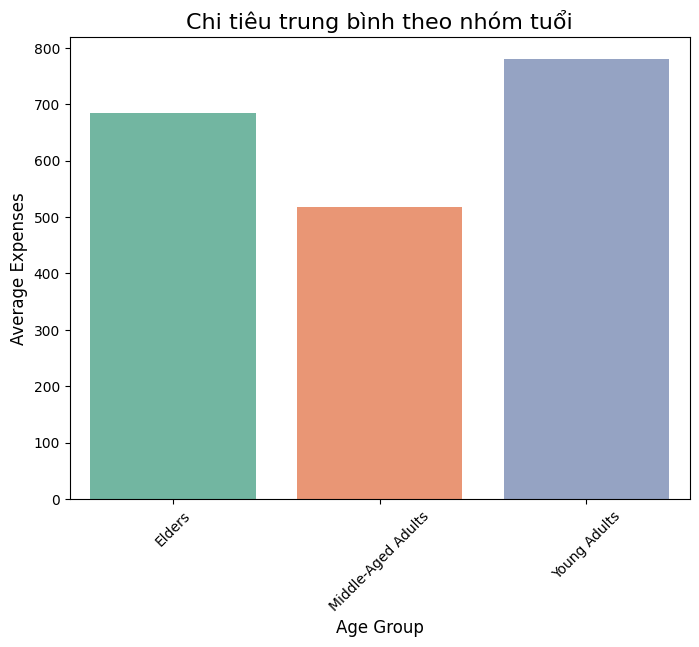

In [48]:
# Tính chi tiêu trung bình theo nhóm tuổi
age_group_expenses = df.groupby('Age_Group')['Expenses'].mean().reset_index()

# Vẽ biểu đồ thanh cho chi tiêu trung bình theo nhóm tuổi
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Expenses', data=age_group_expenses, hue='Age_Group', dodge=False, palette='Set2')
plt.title('Chi tiêu trung bình theo nhóm tuổi', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Expenses', fontsize=12)
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Loại bỏ legend nếu không cần thiết
plt.show()


Nhận xét:
+ Nhóm "Elders" có chi tiêu trung bình cao nhất.
Nhóm "Middle-Aged Adults" có chi tiêu trung bình thấp hơn.
Nhóm "Young Adults" có chi tiêu trung bính thấp nhất

+ Có sự chênh lệch chi tiêu các nhóm tuổi

=> có thể phân tích những nhu cầu và ưu tiên chi tiêu khác nhau dựa vào nhóm tuổi.
Có tính đồng nhất ( tính dao động ít).

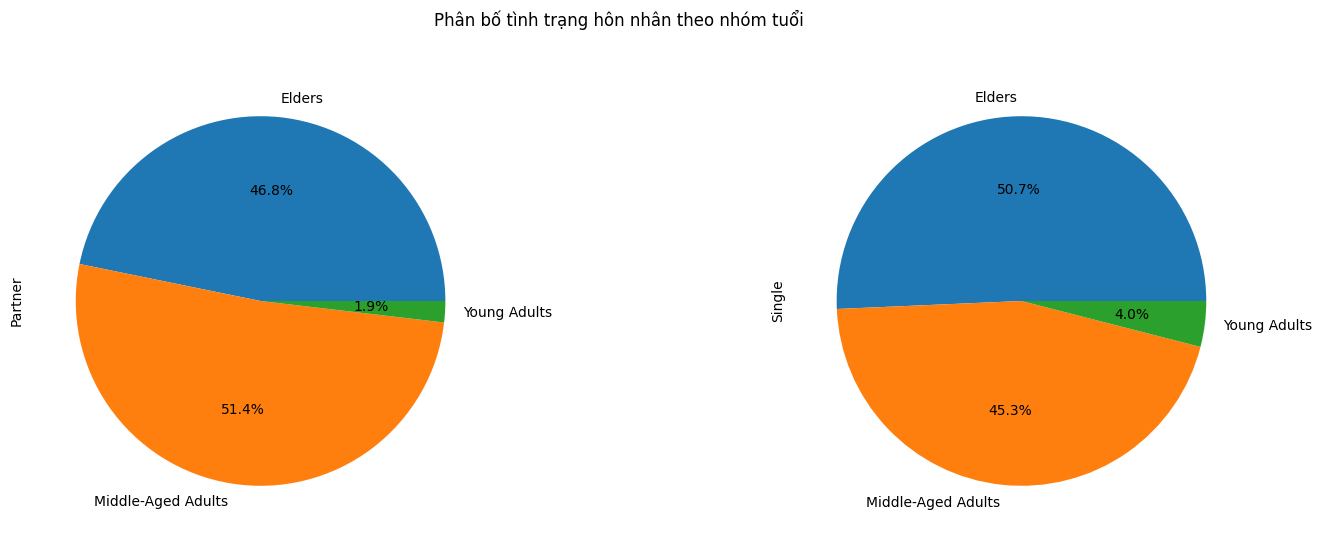

In [49]:
summary = df.groupby('Age_Group').agg({
    'Income': 'mean',
    'Expenses': 'mean',
    'TotalNumPurchases': 'sum'
}).reset_index()

# Biểu đồ hình tròn để phân bổ tình trạng hôn nhân
marital_status = df.groupby(['Age_Group', 'Marital_Status']).size().unstack().fillna(0)
marital_status.plot(kind='pie', subplots=True, figsize=(18, 6), autopct='%1.1f%%', legend=False)
for ax in plt.gcf().axes:
    ax.set_title(ax.get_title(), fontsize=12)
plt.suptitle('Phân bố tình trạng hôn nhân theo nhóm tuổi')
plt.show()

+ Nhóm tuổi Elders: Có tỷ lệ người độc thân và người đã kết hôn gần như tương đương.
+ Nhóm tuổi Middle-Aged Adults: Chủ yếu là người đã kết hôn.
+ Nhóm tuổi Young Adults: Tỷ lệ người độc thân cao hơn so với người đã kết hôn.

Quyết định kinh doanh và tiếp thị:
+ Elders: Cung cấp các dịch vụ và sản phẩm phù hợp cho cả người độc thân và người đã kết hôn.
+ Middle-Aged Adults: Tập trung vào các sản phẩm và dịch vụ dành cho gia đình và cặp đôi.
+ Young Adults: Tập trung vào các sản phẩm và dịch vụ cá nhân hóa, phù hợp với lối sống độc lập.

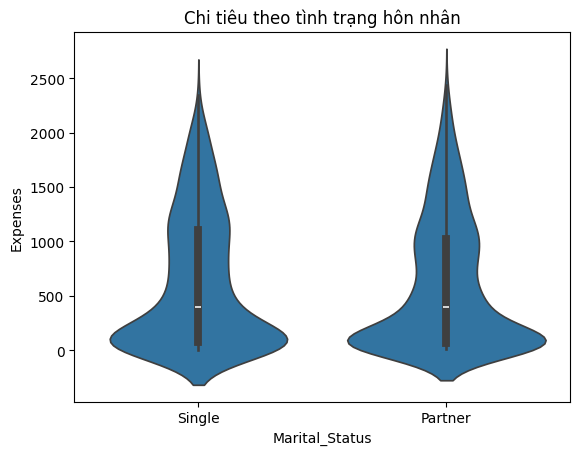

In [50]:
# Chi tiêu theo tình trạng hôn nhân
sns.violinplot(x='Marital_Status', y='Expenses', data=df)
plt.title('Chi tiêu theo tình trạng hôn nhân')
plt.show()


Nhận xét:
+ 2 biểu đồ tương đối giống nhau.
+ Chi tiêu thấp hơn, chi tiêu cao hiếm gặp nhưng vẫn tồn tại.
+ Thanh màu trắng trên biểu đồ là chi tiêu trung bình (Tương đối bằng nhau).
+ Khoản chi tiêu phổ biến nhất là dưới 500.

=> Dữ liệu không tập trung vào 1 khoảng giá trị nhất định nào, mà trải rộng => Chi tiêu của họ trải rộng từ thấp đến cao.

=> Vẫn có ít người có chi tiêu rất cao, nhưng phần lớn ở chi tiêu mức vừa phải.

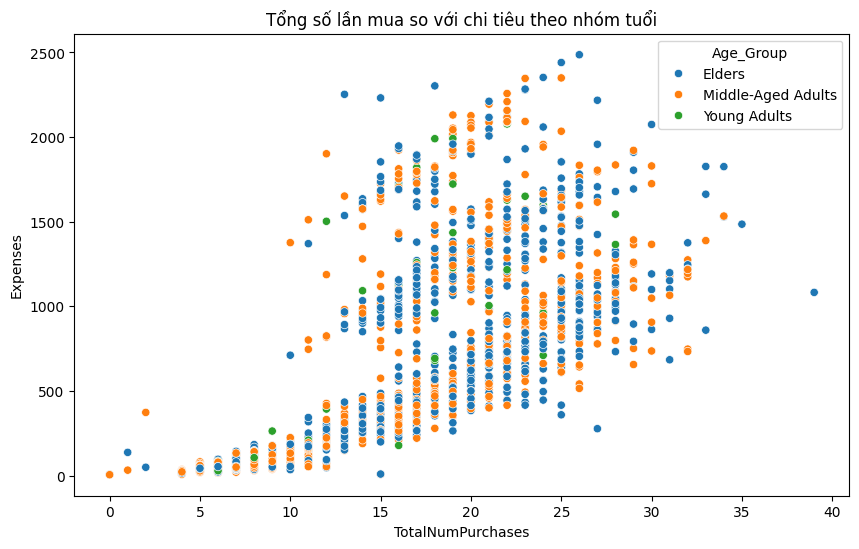

In [51]:
# Phân tích số lần mua hàng và tần suất giao dịch:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalNumPurchases', y='Expenses', hue='Age_Group', data=df)
plt.title('Tổng số lần mua so với chi tiêu theo nhóm tuổi')
plt.show()

Nhận xét:

(TotalNumPurchases) và chi tiêu (Expenses) ở tất cả các nhóm tuổi.

=> Khi số lần mua hàng tăng, chi tiêu cũng tăng theo.

Phân bố theo nhóm tuổi:
+ Người trung niên (Middle-Aged Adults)  chiếm đa số.
+ Người cao tuổi (Elders) có ít điểm dữ liệu hơn.
+ Người trẻ (Young Adults) có ít điểm dữ liệu nhất.


Mức chi tiêu:
+ Người trung niên có xu hướng chi tiêu cao nhất, với nhiều điểm dữ liệu ở vùng trên của biểu đồ.
+ Người cao tuổi có mức chi tiêu đa dạng, từ thấp đến cao.
+ Người trẻ chi tiêu thấp nhất.


Số lần mua hàng:
+ Hầu hết các giao dịch tập trung trong khoảng 0-25 lần mua.
+ Có một số ít khách hàng (chủ yếu là người trung niên và cao tuổi) có số lần mua hàng cao hơn 25.

Điểm đặc biệt:
+ Có một vài điểm dữ liệu ngoại lệ với số lần mua hàng rất cao (trên 30) và chi tiêu tương đối thấp, chủ yếu thuộc nhóm trung niên.
+ Một số ít người cao tuổi có mức chi tiêu cao nhất trong mẫu.

Nhận xét về Sự phân tán:
+ Ở mức chi tiêu và số lần mua hàng thấp, các nhóm tuổi có sự chồng chéo đáng kể.
+ Khi số lần mua hàng và chi tiêu tăng, sự phân biệt giữa các nhóm tuổi trở nên rõ ràng hơn.

**Tổng kết lại: Nhận xét về hàm ý kinh doanh:**

=> Người trung niên dường như là nhóm khách hàng chính, với cả số lượng và giá trị giao dịch cao.

=> Có cơ hội tiềm năng để tăng số lần mua hàng và chi tiêu của nhóm khách hàng trẻ.

=> Chiến lược marketing có thể được điều chỉnh để phù hợp với hành vi mua sắm của từng nhóm tuổi.

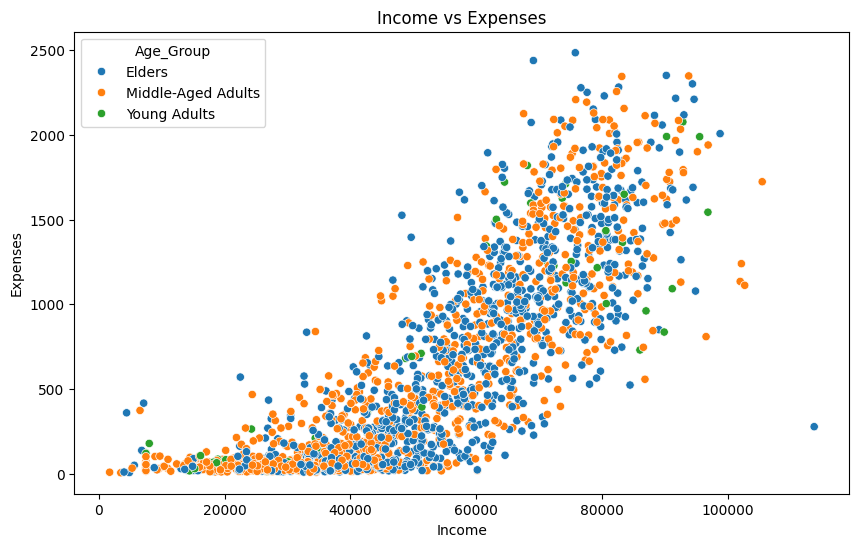

In [52]:
# Biểu đồ phân tán thu nhập và chi phí
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Expenses', hue='Age_Group')
plt.title('Income vs Expenses')
plt.xlabel('Income')
plt.ylabel('Expenses')
plt.show()

Mối quan hệ giữa thu nhập và chi phí:
+ Xu hướng chung: Có một xu hướng tăng dần, cho thấy rằng khi thu nhập tăng, chi phí cũng có xu hướng tăng theo. Điều này hợp lý vì những người có thu nhập cao hơn thường có khả năng chi tiêu nhiều hơn.
+ Phân tán: Mặc dù có xu hướng chung, nhưng vẫn có sự phân tán lớn, nghĩa là không phải tất cả mọi người có thu nhập cao đều chi tiêu nhiều và ngược lại.

Phân tích theo nhóm tuổi:
+ Elders: Nhóm này có xu hướng chi tiêu ít hơn so với thu nhập của họ. Điều này có thể do họ có xu hướng tiết kiệm nhiều hơn hoặc có ít nhu cầu chi tiêu.
+ Middle-Aged Adults: Nhóm này có sự phân tán lớn nhất, cho thấy sự đa dạng trong hành vi chi tiêu. Một số người chi tiêu nhiều hơn so với thu nhập, trong khi những người khác chi tiêu ít hơn.
+ Young Adults: Nhóm này có xu hướng chi tiêu nhiều hơn so với thu nhập của họ, có thể do họ đang ở giai đoạn xây dựng cuộc sống và sự nghiệp, cần đầu tư nhiều vào các nhu cầu cá nhân và gia đình.

Chiến lược tiếp thị:
+ Elders: Tập trung vào các sản phẩm hoặc dịch vụ tiết kiệm, đầu tư, hoặc chăm sóc sức khỏe, vì họ có xu hướng tiết kiệm và chi tiêu ít hơn.
+ Middle-Aged Adults: Đa dạng hóa các sản phẩm và dịch vụ để phù hợp với nhu cầu đa dạng của nhóm này. Các chương trình khuyến mãi và gói dịch vụ gia đình có thể thu hút họ.
+ Young Adults: Tập trung vào các sản phẩm hoặc dịch vụ hỗ trợ xây dựng sự nghiệp và cuộc sống, như giáo dục, công nghệ, và các dịch vụ tài chính.

Quyết định kinh doanh:
+ Nghiên cứu thị trường: Đầu tư vào nghiên cứu thị trường để hiểu rõ hơn về hành vi chi tiêu của từng nhóm tuổi, từ đó điều chỉnh sản phẩm và dịch vụ cho phù hợp.
+ Phát triển sản phẩm: Phát triển các sản phẩm và dịch vụ mới dựa trên nhu cầu và hành vi chi tiêu của từng nhóm tuổi, đảm bảo đáp ứng đúng nhu cầu của khách hàng.

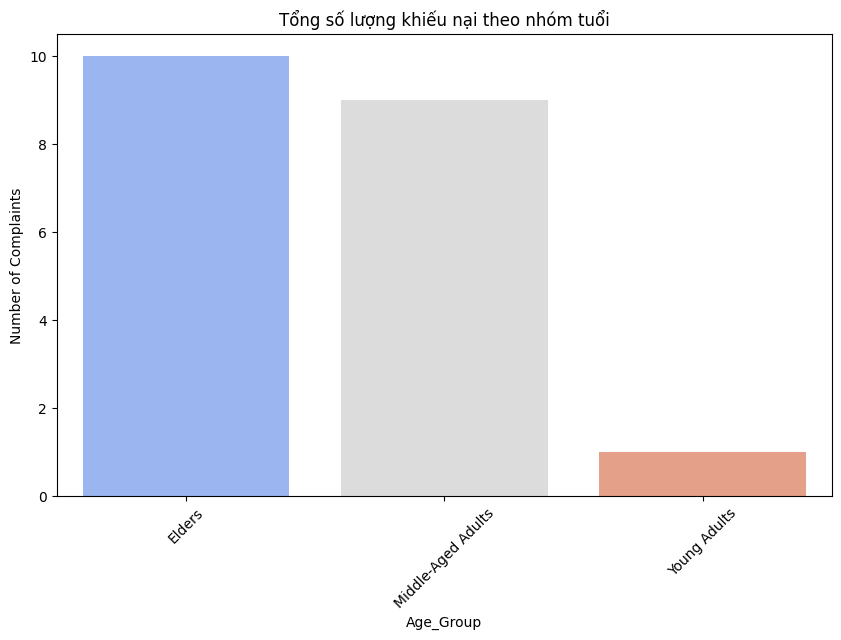

In [53]:
complaints = df.groupby('Age_Group')['Complain'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=complaints, x='Age_Group', y='Complain',palette="coolwarm")
plt.title('Tổng số lượng khiếu nại theo nhóm tuổi')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

Từ biểu đồ này ta thấy thứ tự lần lược tổng phàn nàn theo từng nhóm tuổi, dựa vào đây ta có thể đưa ra chiến lược kinh doanh, quảng cáo, hậu mãi cho từng nhóm khách hàng


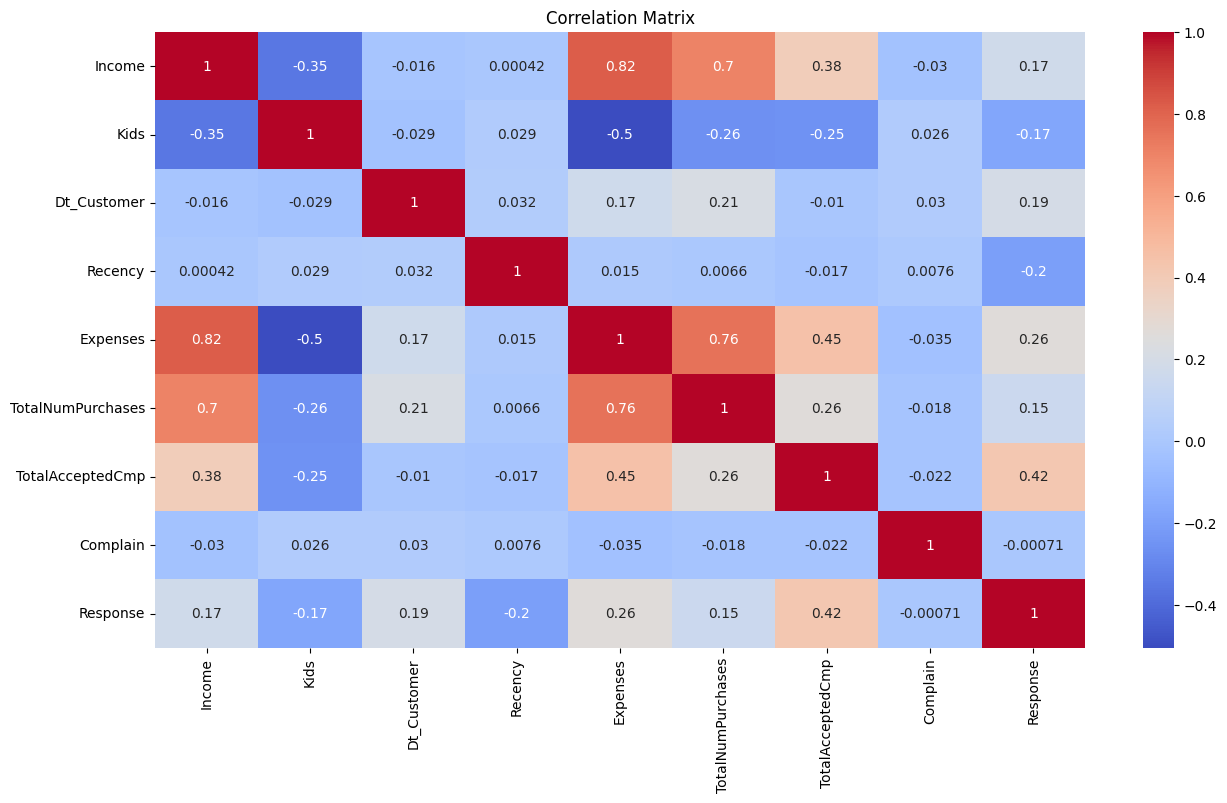

In [54]:
# Chỉ chọn các cột có kiểu dữ liệu số
numeric_df = df.select_dtypes(include='number')

# Tính toán ma trận tương quan
correlation_matrix = numeric_df.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



Nhận xét:

Tương quan mạnh
+ Income và Expenses có tương quan dương mạnh nhất =>  thu nhập và chi tiêu có mối liên hệ chặt chẽ.
+ Income và TotalNumPurchases cũng có tương quan dương mạnh => Người có thu nhập cao thì mua sắm nhiều hơn.

Tương quan âm
+ Kids và Income có tương quan âm => gia đình có nhiều con có thể có thu nhập thấp hơn.
+ Kids và Expenses cũng có tương quan âm khá mạnh.

Biến ít tương quan:
+ Recency có tương quan yếu với hầu hết các biến khác, với các giá trị gần 0.
+ Complain cũng tương tự =>  việc khiếu nại không liên quan nhiều đến các yếu tố khác.

Tương quan trung bình:
+ TotalAcceptedCmp có tương quan dương trung bình
=> cho thấy mối liên hệ giữa việc chấp nhận chiến dịch marketing với thu nhập, chi tiêu và phản hồi.

Tương quan giữa các biến liên quan:
+ Expenses, TotalNumPurchases và Income đều có tương quan dương mạnh với nhau,
=>phản ánh mối quan hệ logic giữa thu nhập, chi tiêu và số lượng mua hàng.

Biến Dt_Customer: Có tương quan yếu với hầu hết các biến khác,
ngoại trừ một tương quan dương nhẹ với TotalNumPurchases (0.21) và Response (0.19).

Response:
Có tương quan dương trung bình với TotalAcceptedCmp (0.42),
cho thấy mối liên hệ giữa việc phản hồi và chấp nhận chiến dịch marketing.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2019 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age_Group          2019 non-null   object 
 1   Education          2019 non-null   object 
 2   Marital_Status     2019 non-null   object 
 3   Income             2019 non-null   float64
 4   Kids               2019 non-null   int64  
 5   Dt_Customer        2019 non-null   int64  
 6   Recency            2019 non-null   int64  
 7   Expenses           2019 non-null   int64  
 8   TotalNumPurchases  2019 non-null   int64  
 9   TotalAcceptedCmp   2019 non-null   int64  
 10  Complain           2019 non-null   int64  
 11  Response           2019 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 205.1+ KB


#Data Processing

In [56]:
def ageGroup(g):
  if g=='Young Adults':
    return 0
  elif g=='Middle-Aged Adults':
    return 1
  else:
    return 2

In [57]:
def education(e):
  if e=='Undergraduate':
    return 0
  elif e=='Graduate':
    return 1
  else:
    return 2

In [58]:
#Label encoding với những label phân loại có thứ bậc: Age_Group, Education
df_encoded=df.copy()
df_encoded['Age_Group']=df_encoded['Age_Group'].apply(ageGroup)
df_encoded['Education']=df_encoded['Education'].apply(education)

In [59]:
#Onehot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=['Marital_Status'], drop_first=True,dtype=int)

In [60]:
df_encoded

,Age_Group,Education,Income,Kids,Dt_Customer,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Marital_Status_Single
0,2,1,58138.0,0,663,58,1617,25,0,0,1,1
1,2,1,46344.0,2,113,38,27,6,0,0,0,1
2,2,1,71613.0,0,312,26,776,21,0,0,0,0
3,1,1,26646.0,1,139,26,53,8,0,0,0,0
4,1,2,58293.0,1,161,94,422,19,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1,1,26816.0,0,681,50,22,4,0,0,0,1
2235,2,1,61223.0,1,381,46,1341,18,0,0,0,0
2237,1,1,56981.0,0,155,91,1241,19,1,0,0,1
2238,2,2,69245.0,1,156,8,843,23,0,0,0,0


#Clustering với K - Means (dựa trên tính tương đồng của các điểm dữ liệu)

In [61]:
# Scale
scaler = StandardScaler()

# fit_transform
X_scaled = scaler.fit_transform(df_encoded)
X_scaled

array([[ 0.99291709, -0.67868029,  0.3129487 , ..., -0.10002501,
         2.35694608,  1.33453802],
       [ 0.99291709, -0.67868029, -0.25818874, ..., -0.10002501,
        -0.42427784,  1.33453802],
       [ 0.99291709, -0.67868029,  0.96549042, ..., -0.10002501,
        -0.42427784, -0.74932297],
       ...,
       [-0.83119538, -0.67868029,  0.25691971, ..., -0.10002501,
        -0.42427784,  1.33453802],
       [ 0.99291709,  1.21655555,  0.85081742, ..., -0.10002501,
        -0.42427784, -0.74932297],
       [ 0.99291709,  1.21655555,  0.05779158, ..., -0.10002501,
         2.35694608, -0.74932297]])

In [62]:
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_scaled)
y_kmeans=kmeans.predict(X_scaled)
X_transformed = scaler.inverse_transform(X_scaled)

In [63]:
pd.DataFrame(X_transformed, columns=df_encoded.columns).head()

,Age_Group,Education,Income,Kids,Dt_Customer,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Marital_Status_Single
0,2.0,1.0,58138.0,0.0,663.0,58.0,1617.0,25.0,0.0,0.0,1.0,1.0
1,2.0,1.0,46344.0,2.0,113.0,38.0,27.0,6.0,0.0,0.0,0.0,1.0
2,2.0,1.0,71613.0,0.0,312.0,26.0,776.0,21.0,0.0,0.0,0.0,0.0
3,1.0,1.0,26646.0,1.0,139.0,26.0,53.0,8.0,0.0,0.0,0.0,0.0
4,1.0,2.0,58293.0,1.0,161.0,94.0,422.0,19.0,0.0,0.0,0.0,0.0


In [64]:
df_clusters=df_encoded.copy()
clusters = kmeans.fit_predict(X_scaled)
df_clusters['Cluster'] = clusters

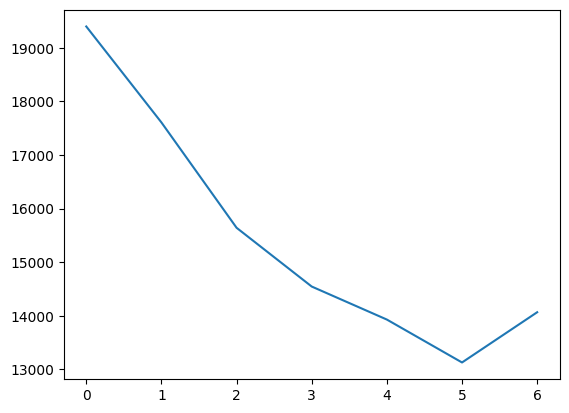

In [65]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)
plt.show()

In [66]:
# Silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.19883476493831895
For n_clusters=3, the silhouette score is 0.1812743226972601
For n_clusters=4, the silhouette score is 0.19102577965648218
For n_clusters=5, the silhouette score is 0.146170419280067
For n_clusters=6, the silhouette score is 0.133573632223493
For n_clusters=7, the silhouette score is 0.13619202112239542
For n_clusters=8, the silhouette score is 0.12449220786262744
For n_clusters=9, the silhouette score is 0.13342192215432783
For n_clusters=10, the silhouette score is 0.13229872126806141


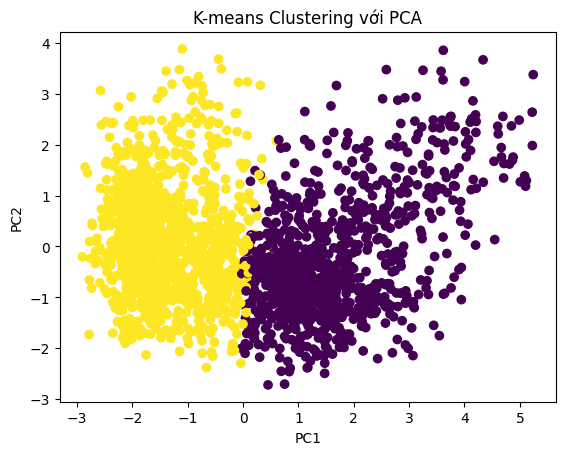

In [67]:
#Trực quan hóa kết quả
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_clusters['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering với PCA')
plt.show()


In [68]:
kmeans=KMeans(n_clusters=2,
              max_iter=50,
              init='k-means++',
              n_init=10,
              random_state=42)
kmeans.fit(X_scaled)
y_kmeans=kmeans.predict(X_scaled)
X_transformed = scaler.inverse_transform(X_scaled)

In [69]:
df_clusters=df_encoded.copy()
clusters = kmeans.fit_predict(X_scaled)
df_clusters['Cluster'] = clusters

In [70]:
df_clusters_tail=df_clusters.copy()

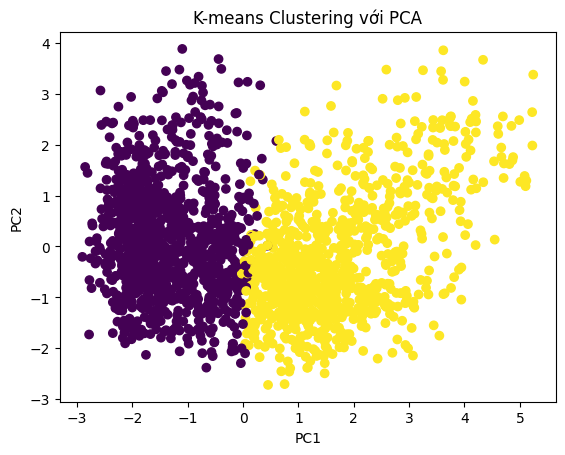

In [71]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_clusters['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering với PCA')
plt.show()

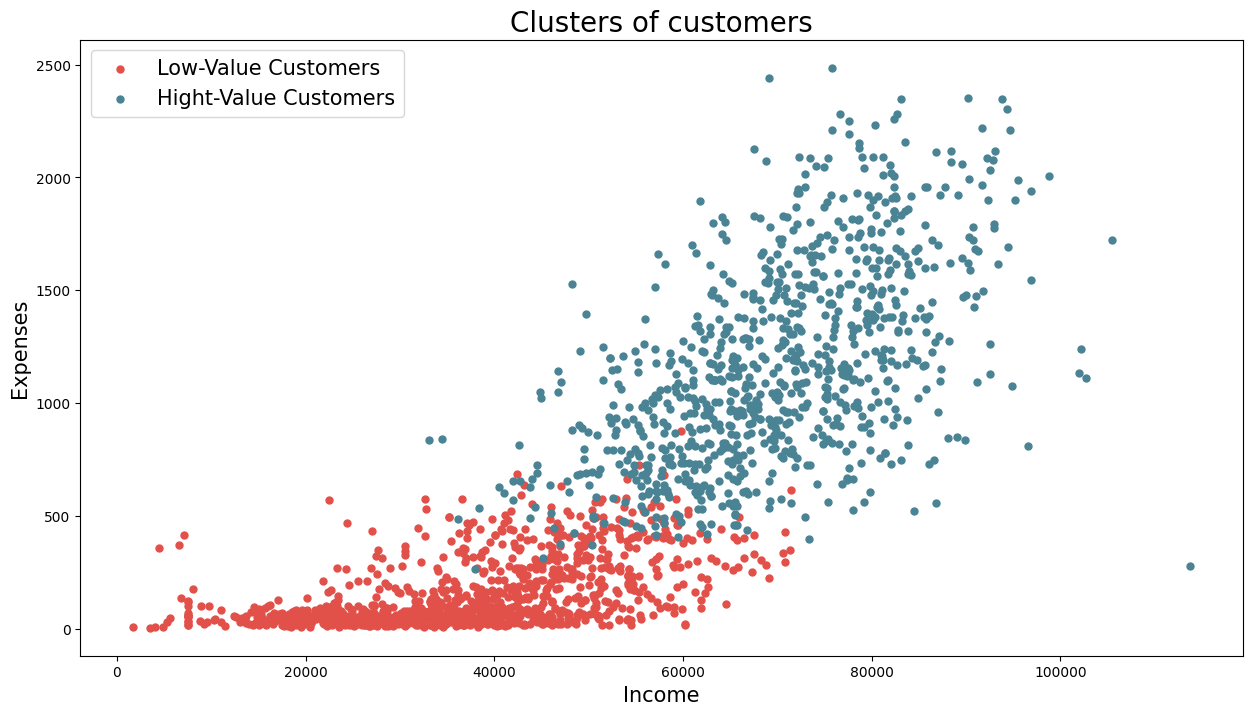

In [72]:
# Visualising the clusters
plt.figure(figsize= (15,8))

plt.scatter(X_transformed[y_kmeans == 0, 2], X_transformed[y_kmeans == 0, 6], s = 25, c = '#E2504A', label = 'Low-Value Customers')
plt.scatter(X_transformed[y_kmeans == 1, 2], X_transformed[y_kmeans == 1, 6], s = 25, c = '#498394', label = 'Hight-Value Customers')

plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

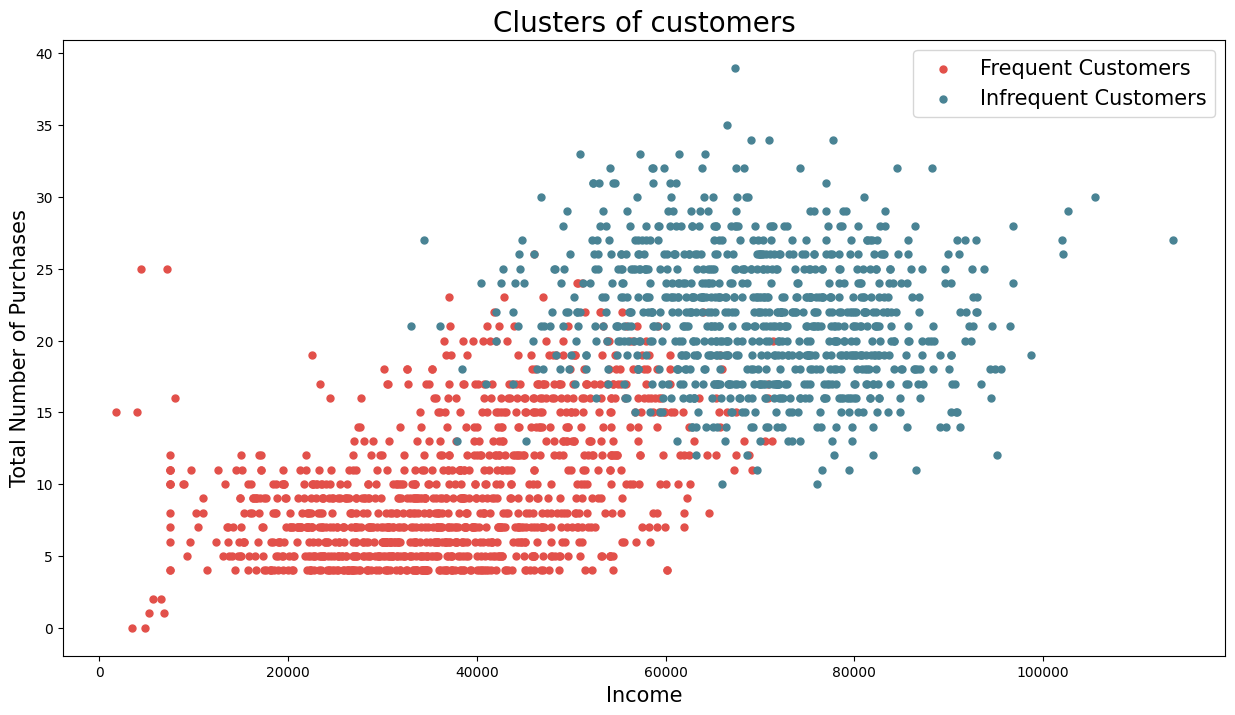

In [73]:
# Visualising the clusters
plt.figure(figsize= (15,8))

plt.scatter(X_transformed[y_kmeans == 0, 2], X_transformed[y_kmeans == 0, 7], s = 25, c = '#E2504A', label = 'Frequent Customers')
plt.scatter(X_transformed[y_kmeans == 1, 2], X_transformed[y_kmeans == 1, 7], s = 25, c = '#498394', label = 'Infrequent Customers')

plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Total Number of Purchases',fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

In [74]:
df_clusters.columns

Index(['Age_Group', 'Education', 'Income', 'Kids', 'Dt_Customer', 'Recency',
       'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp', 'Complain',
       'Response', 'Marital_Status_Single', 'Cluster'],
      dtype='object')

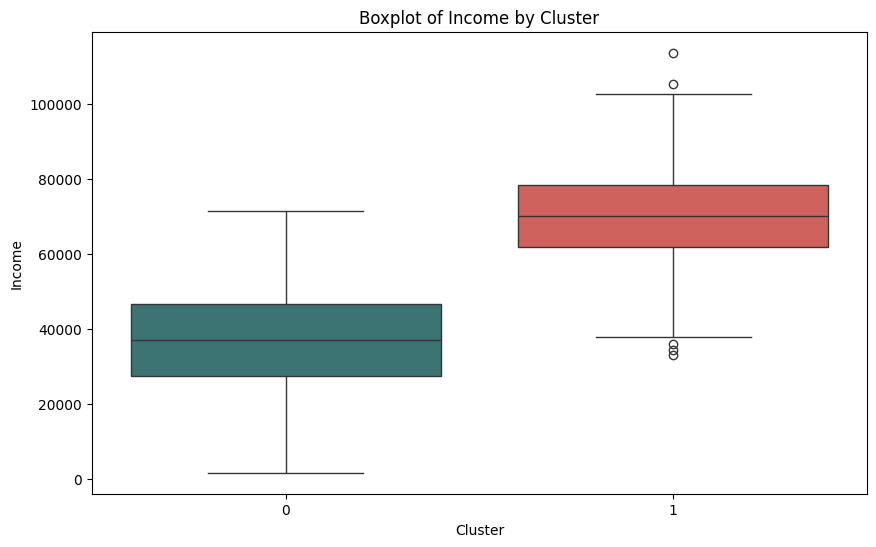

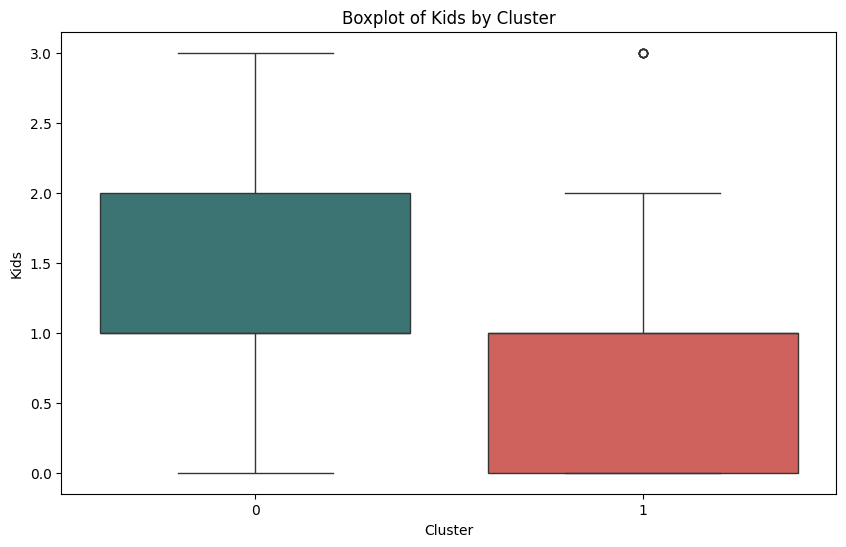

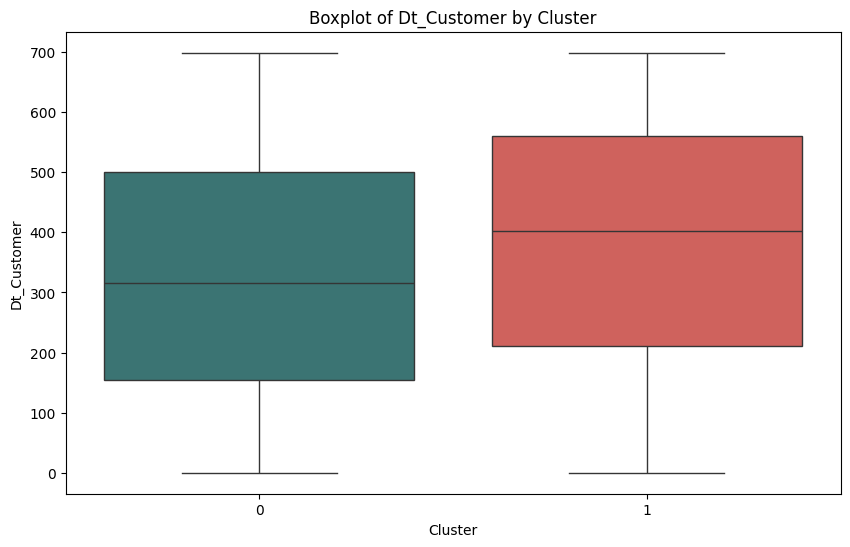

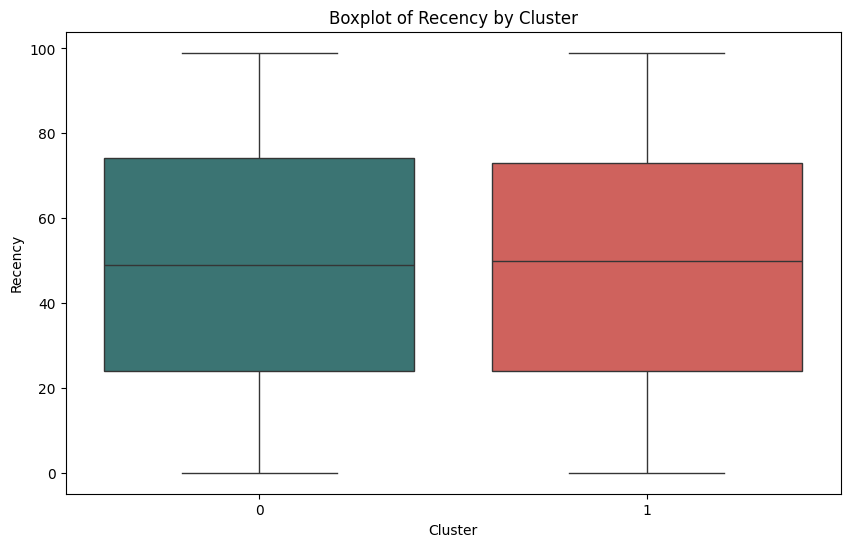

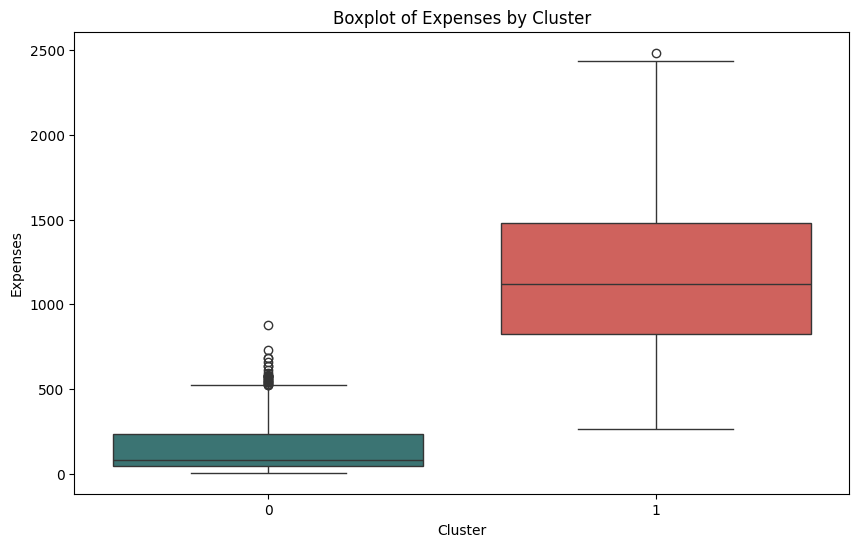

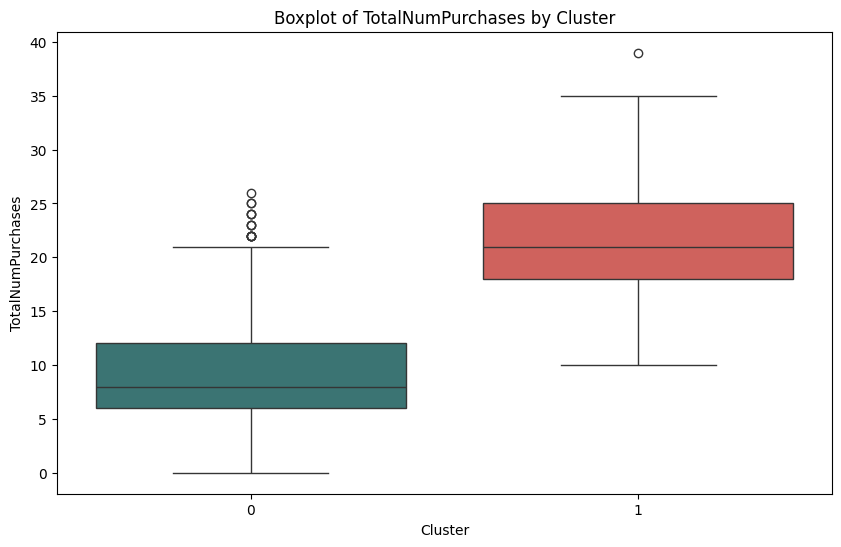

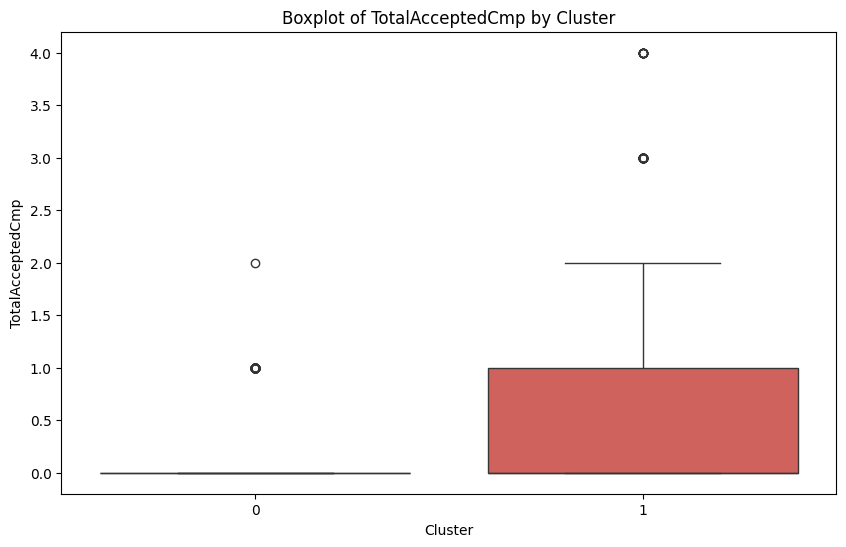

In [75]:
# # Create a copy of the original DataFrame and add a new column 'Cluster'
# df_clusters = df.copy()
# df_clusters['Cluster'] = y_kmeans

columns_to_plot = ['Income', 'Kids', 'Dt_Customer', 'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=df_clusters, palette=custom_palette)  # Adjust palette as needed
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

In [76]:
df_clusters

,Age_Group,Education,Income,Kids,Dt_Customer,Recency,Expenses,TotalNumPurchases,TotalAcceptedCmp,Complain,Response,Marital_Status_Single,Cluster
0,2,1,58138.0,0,663,58,1617,25,0,0,1,1,1
1,2,1,46344.0,2,113,38,27,6,0,0,0,1,0
2,2,1,71613.0,0,312,26,776,21,0,0,0,0,1
3,1,1,26646.0,1,139,26,53,8,0,0,0,0,0
4,1,2,58293.0,1,161,94,422,19,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1,1,26816.0,0,681,50,22,4,0,0,0,1,0
2235,2,1,61223.0,1,381,46,1341,18,0,0,0,0,1
2237,1,1,56981.0,0,155,91,1241,19,1,0,0,1,1
2238,2,2,69245.0,1,156,8,843,23,0,0,0,0,1


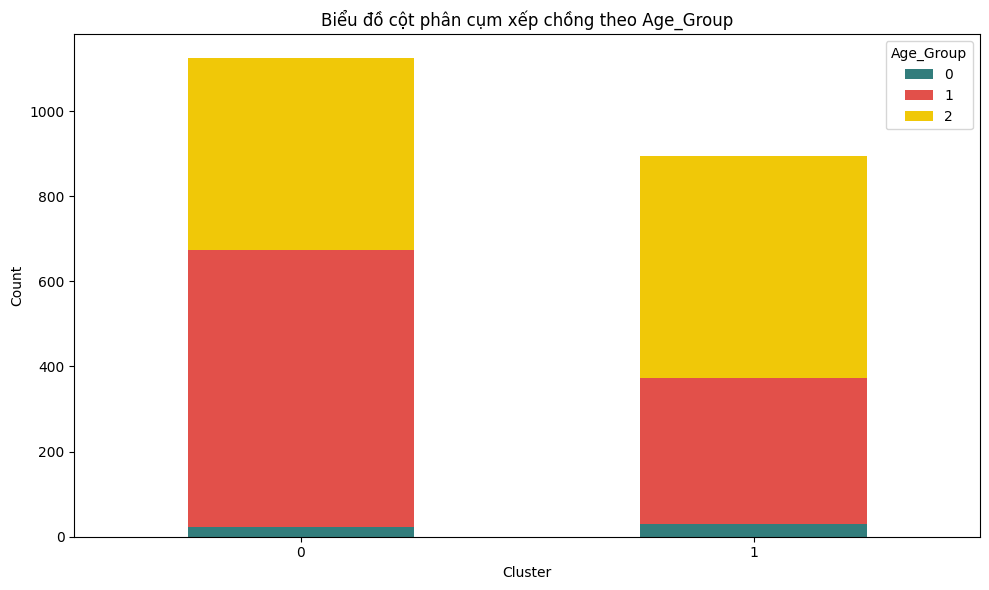

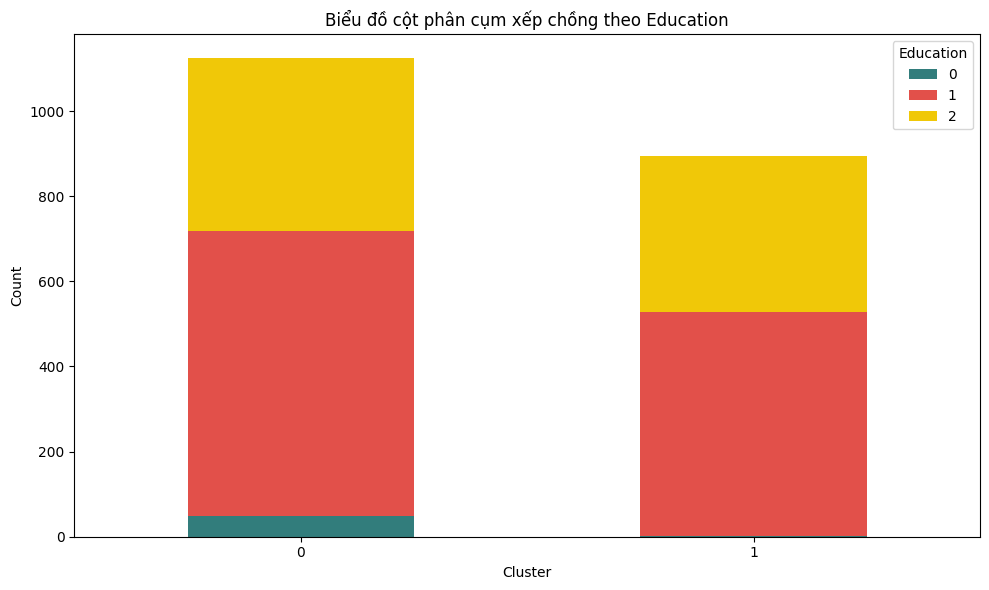

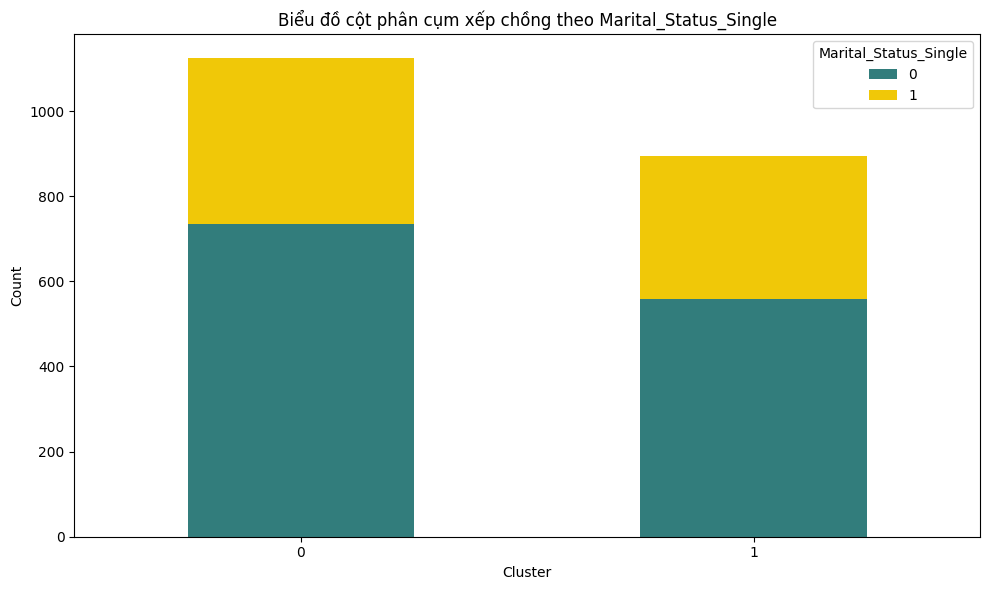

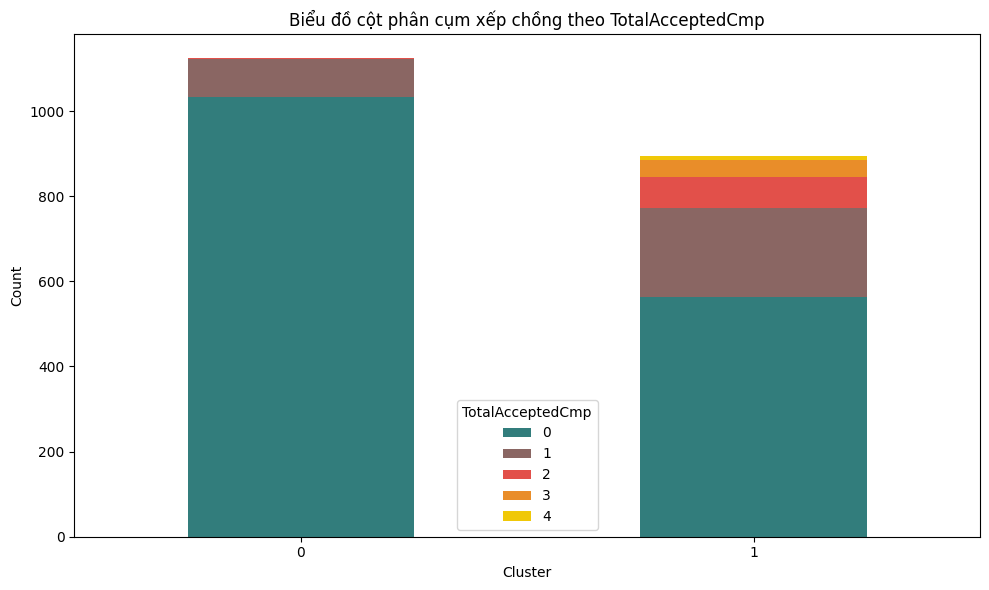

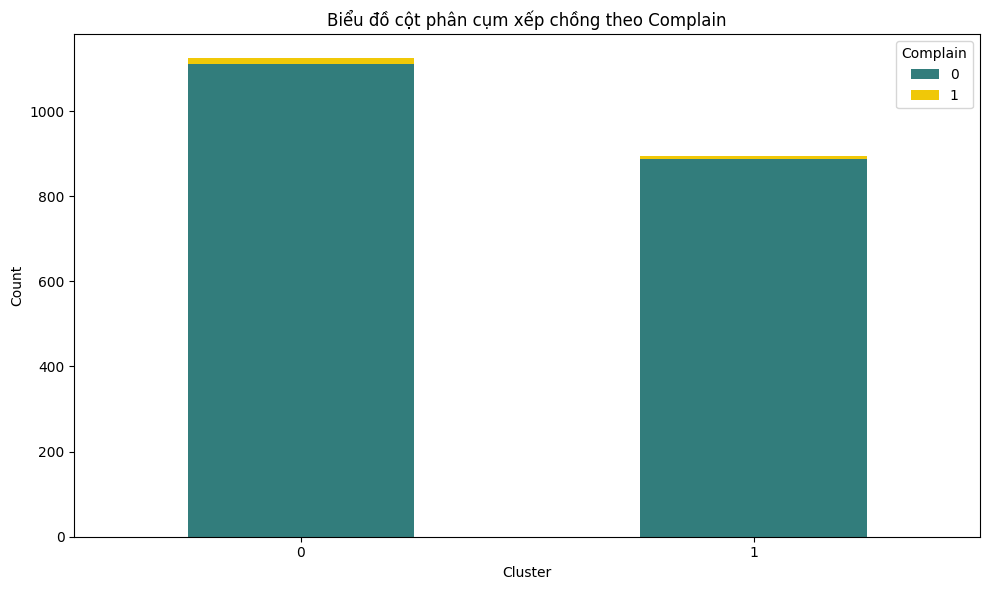

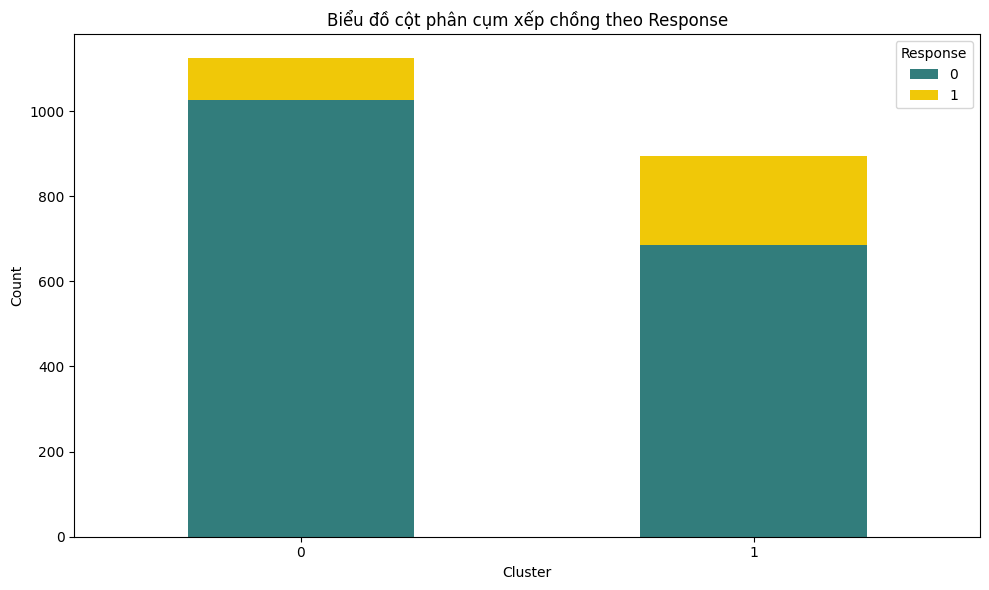

In [77]:
categorical_columns = ['Age_Group','Education', 'Marital_Status_Single','TotalAcceptedCmp','Complain'	,'Response']
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette)
for column in categorical_columns:
    # Prepare data
    data = df_clusters.groupby(['Cluster', column]).size().unstack().fillna(0)

    # Plot stacked bar chart
    data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap)

    plt.title(f'Biểu đồ cột phân cụm xếp chồng theo {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

🪙 **Nhóm 0:**
- Nhóm thu nhập trung bình và thấp
- Thường có vợ/chồng
- Có 2 con trở lên
- Tốt nghiệp hoặc Sau đại học hoặc chưa học đại học
- Chi phí thấp và số lần mua hàng ít
- Không chấp nhận khuyến mại


💵 **Nhóm 1:**

- Nhóm thu nhập cao
- Không có con hoặc 1 con
- Thường có bạn đời
- Tốt nghiệp hoặc sau đại học
- Số lần mua hàng cao
- Chi phí cao

# Logistic Regression ( test )

In [78]:
df_clusters = df_clusters.drop(columns=['Cluster'])

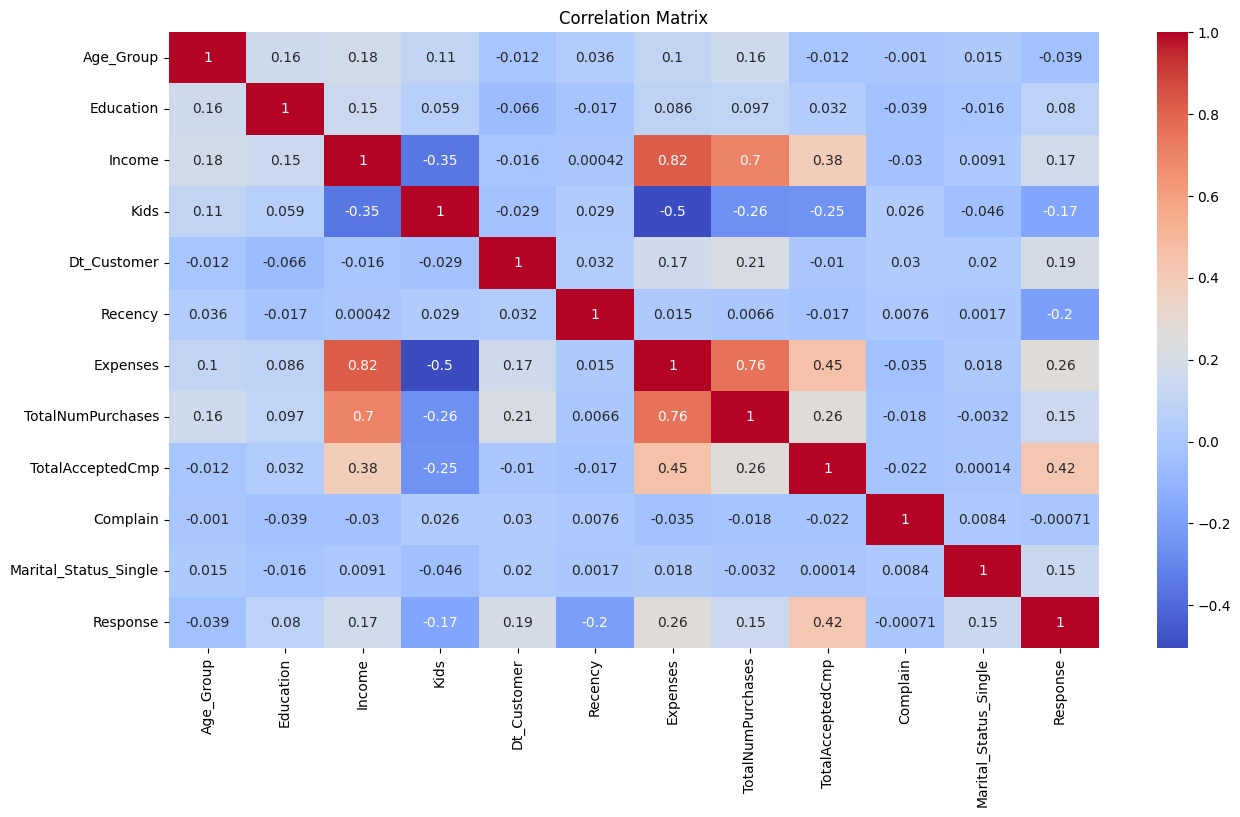

In [79]:


cols = [col for col in df_encoded if col != 'Response'] + ['Response']
df_clusters = df_clusters[cols]

correlation_matrix = df_clusters.corr()
# print(correlation_matrix)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [80]:
# Từ ma trận tương quan, ta chọn được các Feature sau
features = df_clusters[['Income', 'Expenses', 'Recency', 'Kids', 'TotalAcceptedCmp', 'Dt_Customer']]
labels = df_clusters['Response']

In [81]:

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

# Khởi tạo và huấn luyện mô hình Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_lr = model_lr.predict(X_test)

# Các chỉ số đánh giá
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)

print(f'Logistic Regression - Accuracy: {accuracy_lr}')
print(f'Logistic Regression - Precision: {precision_lr}')

# Cross-validation cho Logistic Regression
scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5)
print(f'Cross-Validation Accuracy (Logistic Regression): {scores_lr.mean()}')



Logistic Regression - Accuracy: 0.8787128712871287
Logistic Regression - Precision: 0.8
Cross-Validation Accuracy (Logistic Regression): 0.8798761609907121


In [82]:
accuracy_list = []

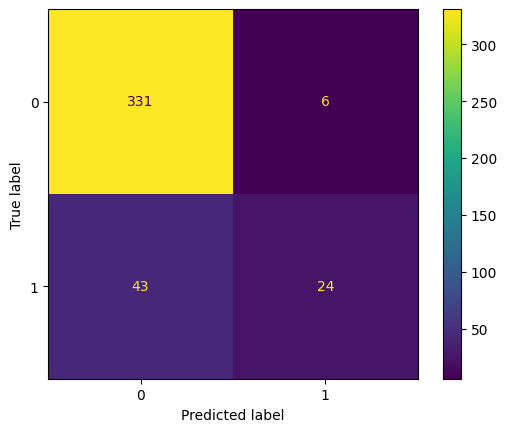

In [83]:
lr_accuracy = (round(accuracy_score(y_pred_lr, y_test), 4) * 100) #percentage
accuracy_list.append(lr_accuracy)
cm = confusion_matrix(y_test,y_pred_lr )
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Logistic Regression cho kết quả tốt với Accuracy khá cao (~88%) và độ chính xác của dự đoán positive ( Precision ) khá tốt (~79%).

Mô hình đơn giản và dễ hiểu, phù hợp với các bài toán phân loại cơ bản.

Độ chính xác trung bình qua 5 lần gấp (folds) của cross-validation là ~88%, cho thấy mô hình có hiệu suất ổn định và không bị overfitting.

Từ tập dữ liệu demo, mô hình dự đoán rằng khách hàng đầu tiên sẽ không phản hồi (0), trong khi khách hàng thứ hai sẽ phản hồi tích cực (1) với chiến dịch tiếp thị, và được coi là tệp khách hàng tiềm năng.

Nhược điểm : Không mạnh mẽ với dữ liệu phi tuyến: Hiệu suất có thể kém khi làm việc với dữ liệu phi tuyến.
Hướng cải thiện: Phân tích sâu hơn để tìm ra các đặc trưng phù hợp nhất cho mô hình

# Random Forest

In [84]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = model_rf.predict(X_test)

# Các chỉ số đánh giá
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
print(f'Random Forest - Accuracy: {accuracy_rf}')
print(f'Random Forest - Precision: {precision_rf}')

# Cross-validation cho Random Forest
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5)
print(f'Cross-Validation Accuracy (Random Forest): {scores_rf.mean()}')

Random Forest - Accuracy: 0.8564356435643564
Random Forest - Precision: 0.6216216216216216
Cross-Validation Accuracy (Random Forest): 0.865015479876161


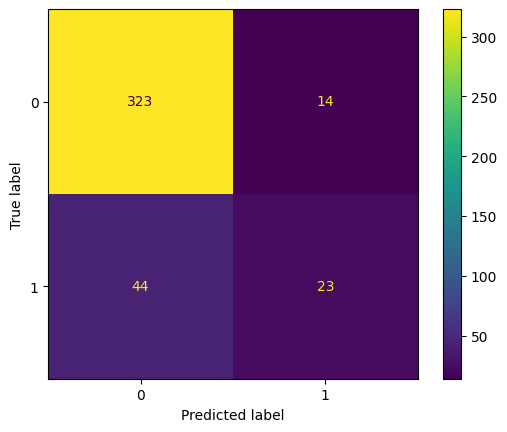

In [85]:
rf_accuracy = (round(accuracy_score(y_pred_rf, y_test), 4) * 100) #percentage
accuracy_list.append(rf_accuracy)
cm = confusion_matrix(y_test,y_pred_rf )
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Random Forest có độ chính xác tổng thể khá tốt nhưng độ chính xác của dự đoán positive thấp hơn Logistic Regression (62% so với ~79%). Việc này có thể đến từ ảnh hưởng của các Feature, ngưỡng phân loại, sự mất cân bằng dữ liệu,...


Mô hình có thể xử lý tốt các mối quan hệ phi tuyến tính và ít bị overfitting do tính đa dạng của các cây quyết định.


# Mô hình phân loại kết hợp phân cụm ( LogisticRegression - K-Means )

In [86]:

# Chuẩn hóa dữ liệu cho K-Means
scaler_kmeans = StandardScaler()
X_scaled = scaler_kmeans.fit_transform(features.values)

# Khởi tạo và huấn luyện mô hình K-Means
kmeans = KMeans(n_clusters=2, max_iter=50, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Thêm kết quả phân cụm vào các đặc trưng
features['Cluster'] = clusters

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu cho Logistic Regression
scaler_lr = StandardScaler()
X_train_scaled = scaler_lr.fit_transform(X_train.values)
X_test_scaled = scaler_lr.transform(X_test.values)

# Khởi tạo và huấn luyện mô hình Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred_lr_k = model_lr.predict(X_test_scaled)

# Các chỉ số đánh giá
accuracy_lr = accuracy_score(y_test, y_pred_lr_k)
precision_lr = precision_score(y_test, y_pred_lr_k)
print(f'Logistic Regression with Cluster - Accuracy: {accuracy_lr}')
print(f'Logistic Regression with Cluster - Precision: {precision_lr}')

# Cross-validation cho Logistic Regression
scores_lr = cross_val_score(model_lr, X_train_scaled, y_train, cv=5)
print(f'Cross-Validation Accuracy (Logistic Regression with Cluster): {scores_lr.mean()}')


Logistic Regression with Cluster - Accuracy: 0.8762376237623762
Logistic Regression with Cluster - Precision: 0.7741935483870968
Cross-Validation Accuracy (Logistic Regression with Cluster): 0.8792569659442726


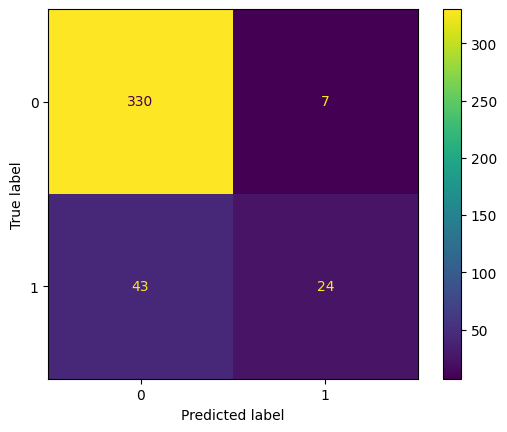

In [87]:
lr_k_accuracy = (round(accuracy_score(y_pred_lr_k, y_test), 4) * 100) #percentage
accuracy_list.append(lr_k_accuracy)
cm = confusion_matrix(y_test,y_pred_lr_k )
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Với các độ đo:
- Accuracy: 0.8762376237623762
- Precision: 0.7741935483870968
- Cross-Validation Accuracy : 0.8792569659442726


Cho thấy mô hình này cho kết quả tốt nhất trong ba mô hình, với độ chính xác và độ chính xác của dự đoán positive cao nhất.

Việc sử dụng K-Means giúp Logistic Regression có thêm thông tin từ cấu trúc dữ liệu, cải thiện độ chính xác của dự đoán.

Nhược điểm: Quá trình huấn luyện phức tạp hơn với nhiều bước, cũng như sẽ phụ thuộc một phần vào số lượng cụm .


Hướng phát triển:
- Tinh chỉnh phân cụm K-Means: Điều chỉnh số lượng cụm, khởi tạo khác nhau và sử dụng các phương pháp chọn cụm tối ưu.

- Nâng cao Logistic Regression: Tinh chỉnh siêu tham số, thêm đặc trưng mới và sử dụng cross-validation nâng cao.
- sử dụng các kỹ thuật chuẩn hóa và xử lý dữ liệu.

In [88]:
accuracy_list

[87.87, 85.64, 87.62]

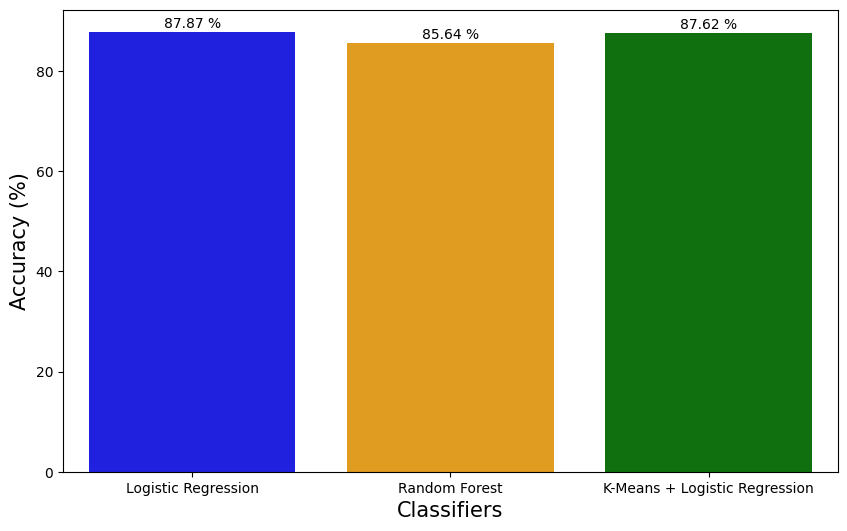

In [89]:
models = ["Logistic Regression","Random Forest","K-Means + Logistic Regression"]
colors = ["blue", "orange", "green"]
plt.figure(figsize=(10,6))
ax = sns.barplot(x=models, y=accuracy_list, palette=colors)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x_draw = p.get_x()
    y_draw = p.get_y()
    ax.annotate(f"{height} %", (x_draw + width/2, y_draw+ height*1.01), ha="center")
plt.show()

#Feature Selection

In [90]:
df_clusters_tail.columns

Index(['Age_Group', 'Education', 'Income', 'Kids', 'Dt_Customer', 'Recency',
       'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp', 'Complain',
       'Response', 'Marital_Status_Single', 'Cluster'],
      dtype='object')

In [91]:
df_select=df_clusters_tail[['Age_Group', 'Education', 'Income', 'Kids', 'Dt_Customer',
       'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp',
       'Complain','Marital_Status_Single', 'Response','Cluster']]

In [92]:
from sklearn.feature_selection import SelectKBest, f_classif,chi2,mutual_info_classif
label=df_select['Cluster']
value=df_select.drop('Cluster',axis=1)
bestFeature = SelectKBest(score_func=f_classif,k='all')
fit = bestFeature.fit(value,label)
dfScores=np.array(fit.scores_)
dfColumn=np.array(value.columns)
featureScore=pd.DataFrame({'Feature':dfColumn,'Score':dfScores})
featureScore['Score']=featureScore['Score'].apply(lambda x:round(x,2))
featureScore=featureScore.sort_values(['Score'],ascending=False)
featureScore

,Feature,Score
6,Expenses,5203.42
7,TotalNumPurchases,3414.82
2,Income,3349.78
3,Kids,504.28
8,TotalAcceptedCmp,299.08
11,Response,84.87
0,Age_Group,50.79
4,Dt_Customer,33.54
1,Education,14.36
10,Marital_Status_Single,2.01


In [93]:
col_select=['Age_Group','Income', 'Kids', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp', 'Response']

In [94]:
df_selection=df_encoded[col_select]

In [95]:
df_selection.head()

,Age_Group,Income,Kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,Response
0,2,58138.0,0,1617,25,0,1
1,2,46344.0,2,27,6,0,0
2,2,71613.0,0,776,21,0,0
3,1,26646.0,1,53,8,0,0
4,1,58293.0,1,422,19,0,0


In [96]:
df_selection['Income'] = df_selection['Income'].astype('int64')


In [97]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2019 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age_Group          2019 non-null   int64
 1   Income             2019 non-null   int64
 2   Kids               2019 non-null   int64
 3   Expenses           2019 non-null   int64
 4   TotalNumPurchases  2019 non-null   int64
 5   TotalAcceptedCmp   2019 non-null   int64
 6   Response           2019 non-null   int64
dtypes: int64(7)
memory usage: 126.2 KB


In [98]:
df_selection

,Age_Group,Income,Kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,Response
0,2,58138,0,1617,25,0,1
1,2,46344,2,27,6,0,0
2,2,71613,0,776,21,0,0
3,1,26646,1,53,8,0,0
4,1,58293,1,422,19,0,0
...,...,...,...,...,...,...,...
2232,1,26816,0,22,4,0,0
2235,2,61223,1,1341,18,0,0
2237,1,56981,0,1241,19,1,0
2238,2,69245,1,843,23,0,0


#CGAN

In [99]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np


In [100]:
# Tách điều kiện và dữ liệu
conditions = torch.tensor(df_selection['Age_Group'].values, dtype=torch.float32).unsqueeze(1)
data = df_selection.drop(columns=['Age_Group']).values
# Tìm min và max của dữ liệu gốc
data_min = np.min(data, axis=0)
data_max = np.max(data, axis=0)
data = torch.tensor((data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0)), dtype=torch.float32)

In [101]:
# 1. Generator
# ---------------------
class Generator(nn.Module):
    def __init__(self, latent_dim, condition_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim + condition_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, z, condition):
        x = torch.cat((z, condition), dim=1)
        return self.model(x)

# ---------------------

In [102]:
# 2. Discriminator
# ---------------------
class Discriminator(nn.Module):
    def __init__(self, input_dim, condition_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim + condition_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.5),  # Tăng dropout để giảm khả năng học của Discriminator
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )


    def forward(self, x, condition):
        x = torch.cat((x, condition), dim=1)
        return self.model(x)

# ---------------------

In [103]:
# 3. Huấn luyện CGAN
# ---------------------
def train_cgan(generator, discriminator, latent_dim, data, conditions, n_epochs=500, n_batch=64, lr=0.0001):
    optimizer_g = torch.optim.Adam(generator.parameters(), lr=0.0002)
    optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=lr)
    criterion = nn.BCELoss()

    for epoch in range(n_epochs):
        for _ in range(len(data) // n_batch):
            # Chọn batch ngẫu nhiên
            idx = torch.randint(0, data.shape[0], (n_batch,))
            X_real = data[idx] + torch.normal(mean=0.0, std=0.01, size=data[idx].size())
            condition_real = conditions[idx]
            y_real = torch.full((n_batch, 1), 0.9)

            # Sinh dữ liệu giả
            z = torch.randn(n_batch, latent_dim)
            X_fake = generator(z, condition_real).detach()  # Tách biệt để tránh ảnh hưởng đồ thị
            y_fake = torch.full((n_batch, 1), 0.1)

            # Huấn luyện Discriminator
            optimizer_d.zero_grad()
            d_loss_real = criterion(discriminator(X_real, condition_real), y_real)
            d_loss_fake = criterion(discriminator(X_fake, condition_real), y_fake)
            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()  # Tính gradient cho Discriminator
            optimizer_d.step()

            # Huấn luyện Generator
            optimizer_g.zero_grad()
            z = torch.randn(n_batch, latent_dim)
            X_fake = generator(z, condition_real)  # Tạo dữ liệu giả mới cho Generator
            y_gan = torch.ones((n_batch, 1))  # Generator cố gắng đánh lừa Discriminator
            g_loss = criterion(discriminator(X_fake, condition_real), y_gan)
            g_loss.backward()  # Tính gradient cho Generator
            optimizer_g.step()
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{n_epochs}, D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

In [104]:
def generate_fake_samples(generator, latent_dim, condition_value, n_samples):
    z = torch.randn(n_samples, latent_dim)
    condition = torch.tensor([[condition_value]] * n_samples, dtype=torch.float32)
    with torch.no_grad():
        X_fake = generator(z, condition).detach().numpy()
    return X_fake

In [105]:
# Kích thước dữ liệu
latent_dim = 128  # Kích thước của noise
output_dim = data.shape[1]  # Số đặc trưng của dữ liệu
condition_dim = conditions.shape[1]  # Điều kiện là `Age_Group`

In [106]:
# Khởi tạo Generator và Discriminator
generator = Generator(latent_dim, condition_dim, output_dim)
discriminator = Discriminator(output_dim, condition_dim)

In [107]:
# Huấn luyện CGAN
train_cgan(generator, discriminator, latent_dim, data, conditions, n_epochs=3200, n_batch=64, lr=0.0001)

Epoch 50/3200, D Loss: 1.3772, G Loss: 0.7263
Epoch 100/3200, D Loss: 1.3962, G Loss: 0.6625
Epoch 150/3200, D Loss: 1.3664, G Loss: 0.7307
Epoch 200/3200, D Loss: 1.3664, G Loss: 0.7077
Epoch 250/3200, D Loss: 1.3496, G Loss: 0.7613
Epoch 300/3200, D Loss: 1.4044, G Loss: 0.6990
Epoch 350/3200, D Loss: 1.3827, G Loss: 0.7053
Epoch 400/3200, D Loss: 1.3904, G Loss: 0.6846
Epoch 450/3200, D Loss: 1.3803, G Loss: 0.6960
Epoch 500/3200, D Loss: 1.3774, G Loss: 0.6998
Epoch 550/3200, D Loss: 1.3943, G Loss: 0.6975
Epoch 600/3200, D Loss: 1.3656, G Loss: 0.7035
Epoch 650/3200, D Loss: 1.4032, G Loss: 0.6769
Epoch 700/3200, D Loss: 1.3556, G Loss: 0.6853
Epoch 750/3200, D Loss: 1.3825, G Loss: 0.7221
Epoch 800/3200, D Loss: 1.4486, G Loss: 0.6518
Epoch 850/3200, D Loss: 1.2744, G Loss: 0.8484
Epoch 900/3200, D Loss: 1.3816, G Loss: 0.7125
Epoch 950/3200, D Loss: 1.3335, G Loss: 0.7980
Epoch 1000/3200, D Loss: 1.3548, G Loss: 0.7264
Epoch 1050/3200, D Loss: 1.3669, G Loss: 0.7092
Epoch 1100/3

 1. Discriminator (D Loss) ~1.2:
Discriminator hoạt động ổn định, duy trì khả năng phân biệt dữ liệu thật và giả một cách hợp lý.
Mức D Loss quanh 1.2 là dấu hiệu cho thấy Discriminator đủ mạnh nhưng không quá áp đảo, đảm bảo sự cân bằng với Generator.
2. Generator (G Loss) ~1.1:
Generator đã học được cách sinh dữ liệu giả với chất lượng cao và khó phân biệt với dữ liệu thật.
Mức G Loss > 1.0 cho thấy Generator đang hoạt động tốt, đánh lừa Discriminator hiệu quả.
3. Tổng quan mô hình
Trạng thái cân bằng:
Cả Discriminator và Generator đều đạt sự cân bằng tốt, không thành phần nào áp đảo thành phần còn lại, giúp mô hình học hiệu quả.
Chất lượng dữ liệu giả sinh ra:
Với D Loss và G Loss như hiện tại, dữ liệu giả được kỳ vọng có độ chân thực cao, phân phối sát với dữ liệu thật.
Hội tụ:
Các giá trị D Loss và G Loss ổn định qua các epoch, cho thấy mô hình CGAN đã hội tụ.

In [109]:
# Hàm đảo ngược chuẩn hóa
def denormalize_data(normalized_data, data_min, data_max):
    original_data = normalized_data * (data_max - data_min) + data_min
    return original_data


In [110]:
t=df_selection[(df_selection['Age_Group']==0)]
print(len(t))
t=df_selection[df_selection['Age_Group']==1]
print(len(t))
t=df_selection[df_selection['Age_Group']==2]
print(len(t))

53
993
973


In [111]:
fake_data0 = generate_fake_samples(generator, latent_dim, condition_value=0, n_samples=1000)
fake_data1 = generate_fake_samples(generator, latent_dim, condition_value=1, n_samples=1000)
fake_data2 = generate_fake_samples(generator, latent_dim, condition_value=2, n_samples=1000)

In [112]:
fake_data_original0 = denormalize_data(fake_data0, data_min, data_max)
fake_data_original1 = denormalize_data(fake_data1, data_min, data_max)
fake_data_original2 = denormalize_data(fake_data2, data_min, data_max)

In [113]:
# Chuyển đổi sang DataFrame (nếu cần)
fake_data_df0 = pd.DataFrame(fake_data_original0, columns=['Income', 'Kids', 'Expenses','TotalNumPurchases', 'TotalAcceptedCmp', 'Response'])
fake_data_df1 = pd.DataFrame(fake_data_original1, columns=['Income', 'Kids', 'Expenses','TotalNumPurchases', 'TotalAcceptedCmp', 'Response'])
fake_data_df2 = pd.DataFrame(fake_data_original2, columns=['Income', 'Kids', 'Expenses','TotalNumPurchases', 'TotalAcceptedCmp', 'Response'])

In [114]:
# Làm tròn toàn bộ cột và chuyển đổi về số nguyên
fake_data_df0 = fake_data_df0.round().astype(int)
fake_data_df1 = fake_data_df1.round().astype(int)
fake_data_df2 = fake_data_df2.round().astype(int)
# Nếu cần đảm bảo giá trị không âm, sử dụng clip
fake_data_df0 = fake_data_df0.clip(lower=0)
fake_data_df1 = fake_data_df1.clip(lower=0)
fake_data_df2 = fake_data_df2.clip(lower=0)
# Thêm cột Age_Group cho từng DataFrame
fake_data_df0['Age_Group'] = 0  # Gán giá trị 0 cho toàn bộ dòng
fake_data_df1['Age_Group'] = 1  # Gán giá trị 1 cho toàn bộ dòng
fake_data_df2['Age_Group'] = 2  # Gán giá trị 2 cho toàn bộ dòng

In [115]:
# Nối tất cả các DataFrame lại với nhau
combined_fake_data = pd.concat([fake_data_df0, fake_data_df1, fake_data_df2], ignore_index=True)

In [116]:
combined_fake_data=combined_fake_data[['Age_Group','Income', 'Kids', 'Expenses','TotalNumPurchases', 'TotalAcceptedCmp', 'Response']]
combined_fake_data

,Age_Group,Income,Kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,Response
0,0,93960,0,2121,26,1,1
1,0,37908,0,250,12,0,0
2,0,43775,0,449,9,0,0
3,0,76810,0,1258,17,0,0
4,0,24167,1,34,6,0,0
...,...,...,...,...,...,...,...
2995,2,40928,2,188,7,0,0
2996,2,54445,1,965,23,1,0
2997,2,37386,1,24,3,0,0
2998,2,35465,3,201,17,0,1


In [117]:
df_final=pd.concat([df_selection,combined_fake_data],ignore_index=True)

In [118]:
df_final

,Age_Group,Income,Kids,Expenses,TotalNumPurchases,TotalAcceptedCmp,Response
0,2,58138,0,1617,25,0,1
1,2,46344,2,27,6,0,0
2,2,71613,0,776,21,0,0
3,1,26646,1,53,8,0,0
4,1,58293,1,422,19,0,0
...,...,...,...,...,...,...,...
5014,2,40928,2,188,7,0,0
5015,2,54445,1,965,23,1,0
5016,2,37386,1,24,3,0,0
5017,2,35465,3,201,17,0,1


#Phân cụm

In [119]:
# Scale
scaler = StandardScaler()

# fit_transform
X_scaled = scaler.fit_transform(df_final)
X_scaled

array([[ 1.08239749,  0.25796912, -1.14127679, ...,  1.4891606 ,
        -0.54167003,  1.92453697],
       [ 1.08239749, -0.32078202,  1.56447107, ..., -0.97685274,
        -0.54167003, -0.5196055 ],
       [ 1.08239749,  0.91920972, -1.14127679, ...,  0.9699999 ,
        -0.54167003, -0.5196055 ],
       ...,
       [ 1.08239749, -0.76036594,  0.21159714, ..., -1.36622327,
        -0.54167003, -0.5196055 ],
       [ 1.08239749, -0.85463259,  2.91734499, ...,  0.4508392 ,
        -0.54167003,  1.92453697],
       [ 1.08239749, -0.94958625,  1.56447107, ..., -1.36622327,
        -0.54167003, -0.5196055 ]])

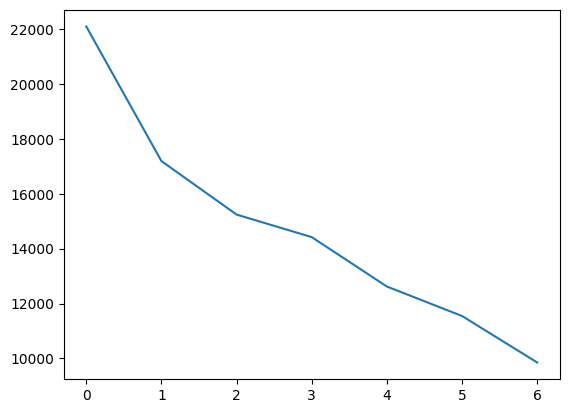

In [120]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)
plt.show()

In [122]:
# Silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.34848828261384573
For n_clusters=3, the silhouette score is 0.30631292048161635
For n_clusters=4, the silhouette score is 0.32555544574175393
For n_clusters=5, the silhouette score is 0.3095141084065125
For n_clusters=6, the silhouette score is 0.28768090406641134
For n_clusters=7, the silhouette score is 0.2959694644062867
For n_clusters=8, the silhouette score is 0.29187837647350057
For n_clusters=9, the silhouette score is 0.2940512567312416
For n_clusters=10, the silhouette score is 0.30145817261187785


In [123]:
kmeans=KMeans(n_clusters=2,
              max_iter=50,
              init='k-means++',
              n_init=10,
              random_state=42)
kmeans.fit(X_scaled)
y_kmeans=kmeans.predict(X_scaled)
X_transformed = scaler.inverse_transform(X_scaled)

In [124]:
df_clusters=df_final.copy()
clusters = kmeans.fit_predict(X_scaled)
df_clusters['Cluster'] = clusters

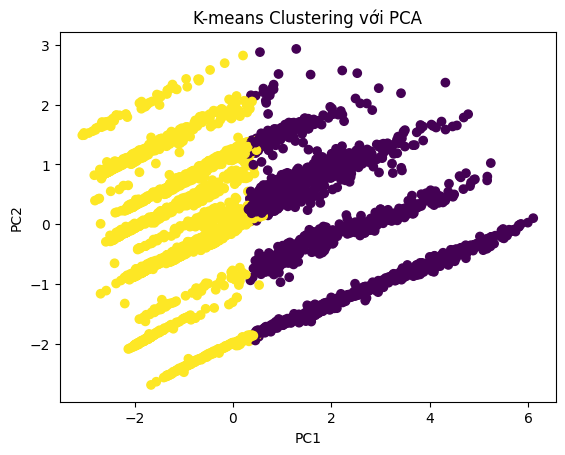

In [125]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_clusters['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering với PCA')
plt.show()

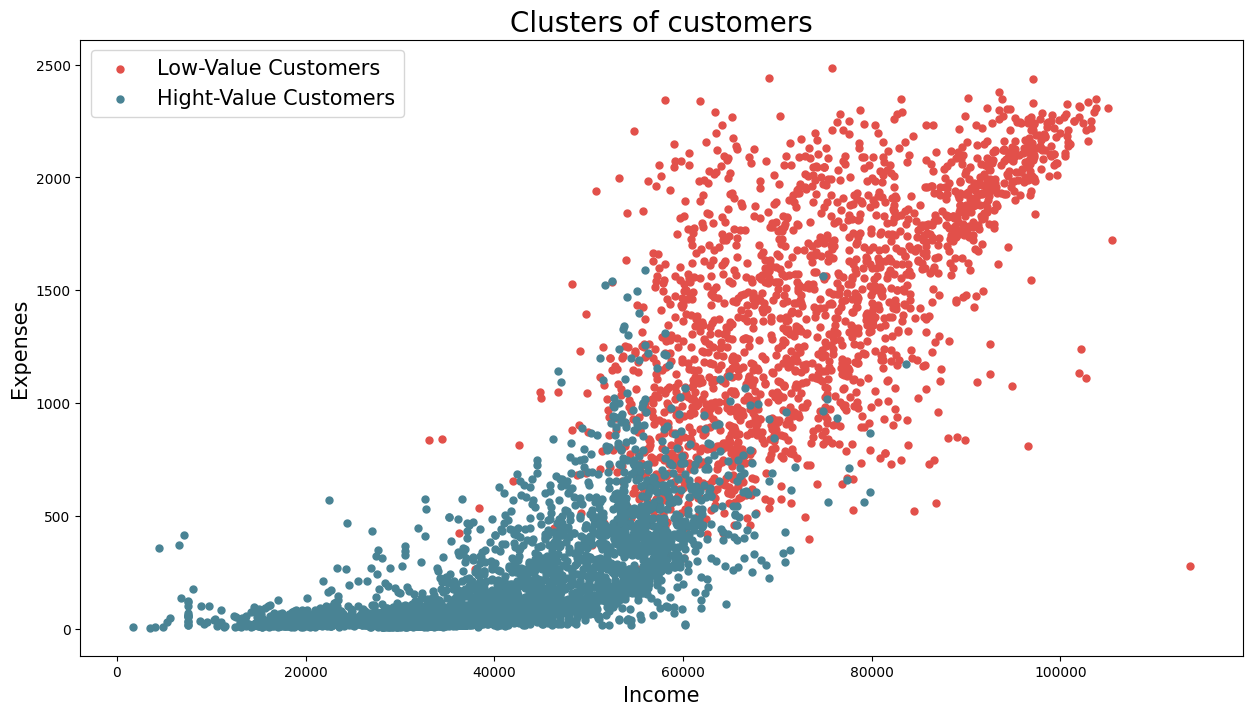

In [126]:
# Visualising the clusters
plt.figure(figsize= (15,8))

plt.scatter(X_transformed[y_kmeans == 0, 1], X_transformed[y_kmeans == 0, 3], s = 25, c = '#E2504A', label = 'Low-Value Customers')
plt.scatter(X_transformed[y_kmeans == 1, 1], X_transformed[y_kmeans == 1, 3], s = 25, c = '#498394', label = 'Hight-Value Customers')

plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

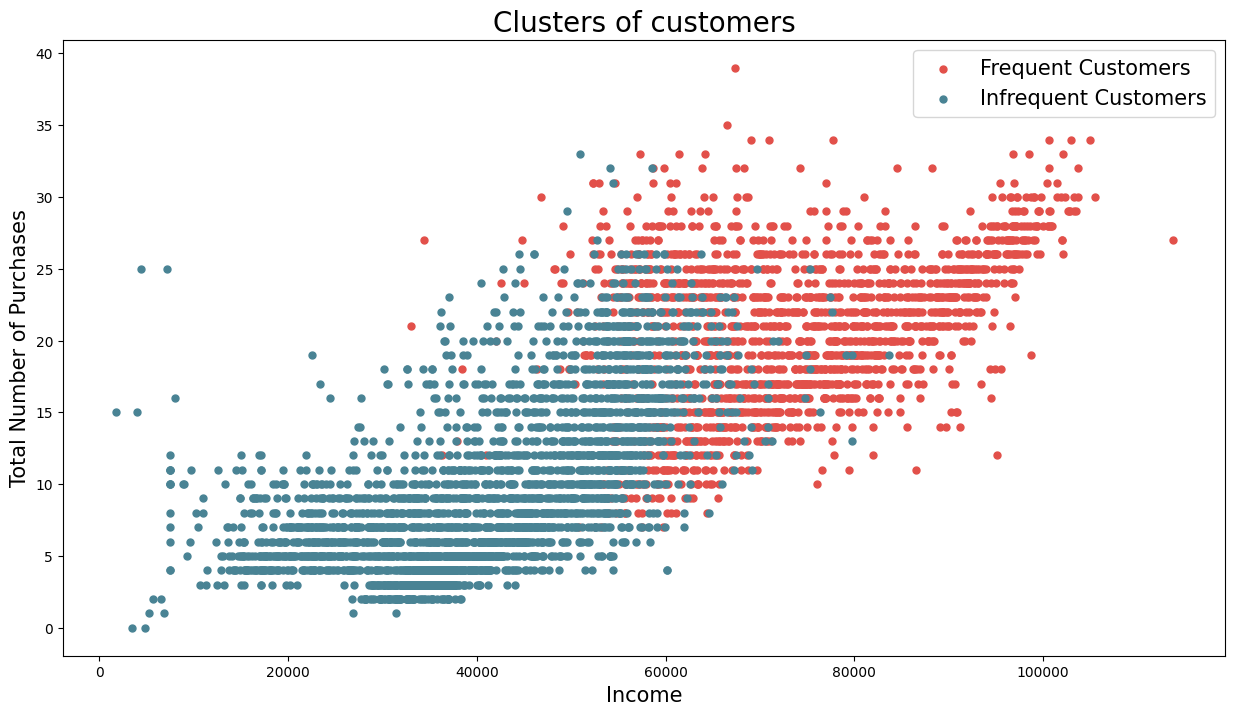

In [127]:
# Visualising the clusters
plt.figure(figsize= (15,8))

plt.scatter(X_transformed[y_kmeans == 0, 1], X_transformed[y_kmeans == 0, 4], s = 25, c = '#E2504A', label = 'Frequent Customers')
plt.scatter(X_transformed[y_kmeans == 1, 1], X_transformed[y_kmeans == 1, 4], s = 25, c = '#498394', label = 'Infrequent Customers')

plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Total Number of Purchases',fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

In [ ]:
df_clusters.columns

Index(['Age_Group', 'Income', 'Kids', 'Expenses', 'TotalNumPurchases',
       'TotalAcceptedCmp', 'Response', 'Cluster'],
      dtype='object')

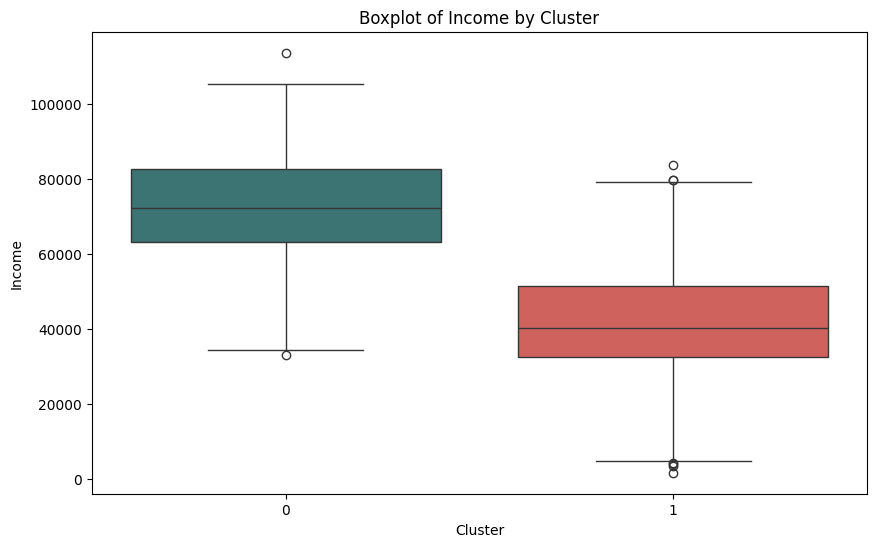

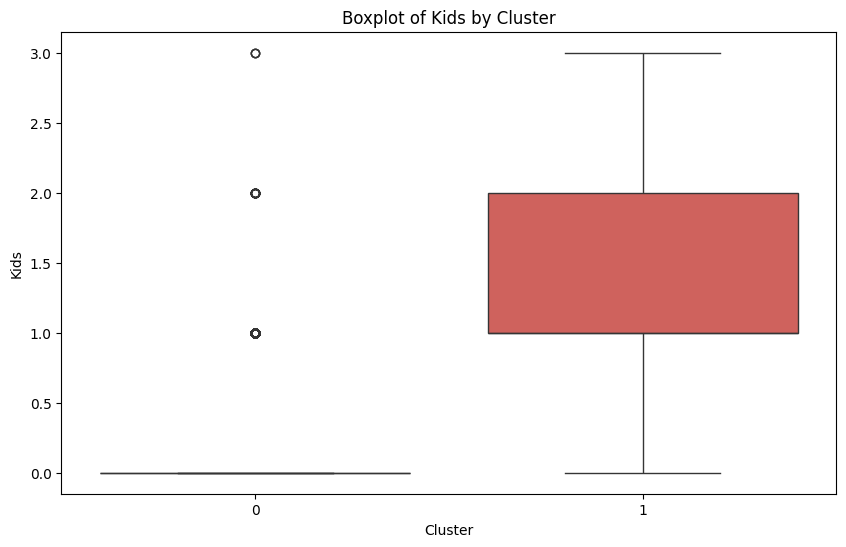

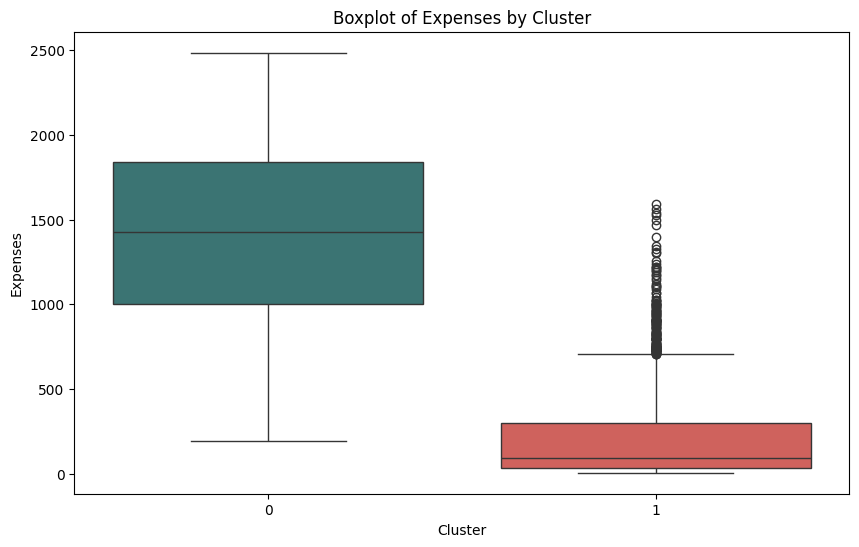

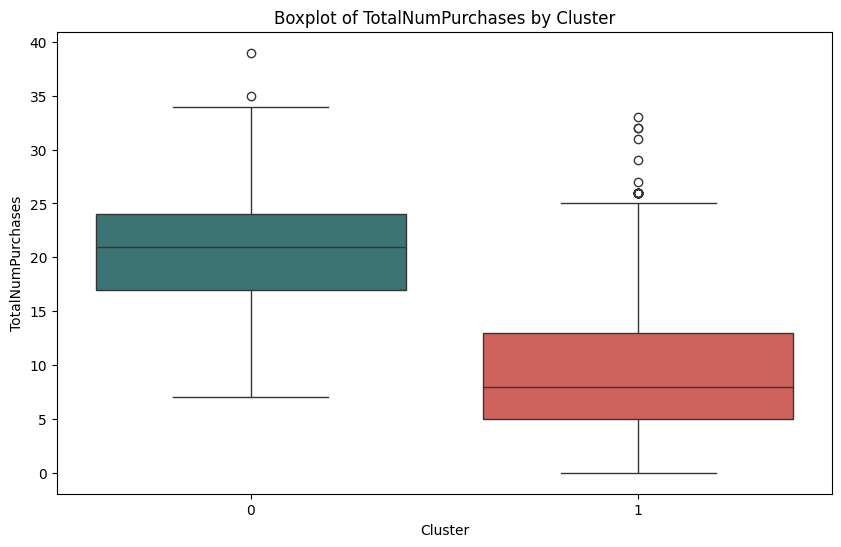

In [128]:
columns_to_plot = ['Income', 'Kids', 'Expenses', 'TotalNumPurchases']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=df_clusters, palette=custom_palette)  # Adjust palette as needed
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

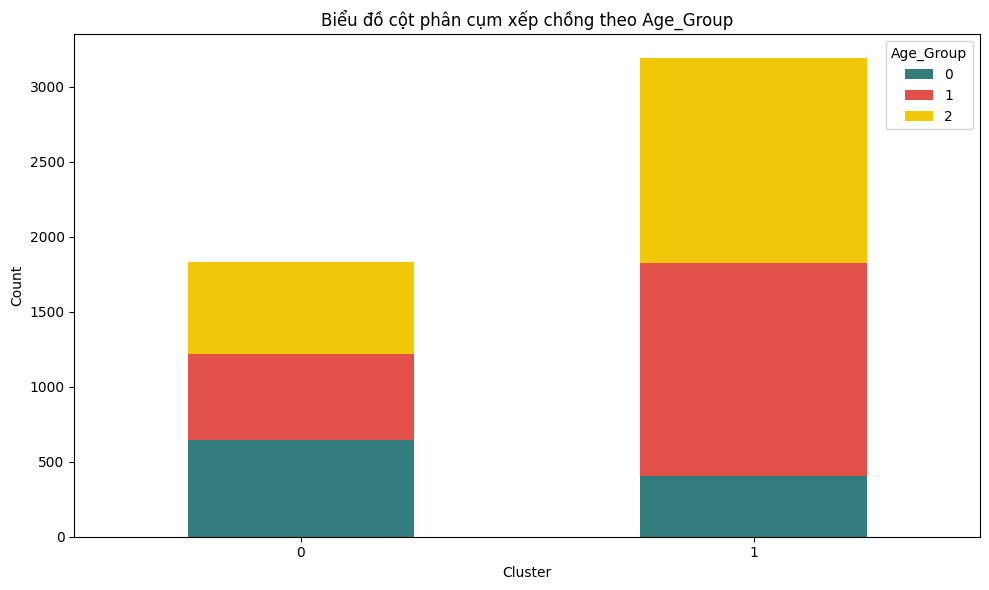

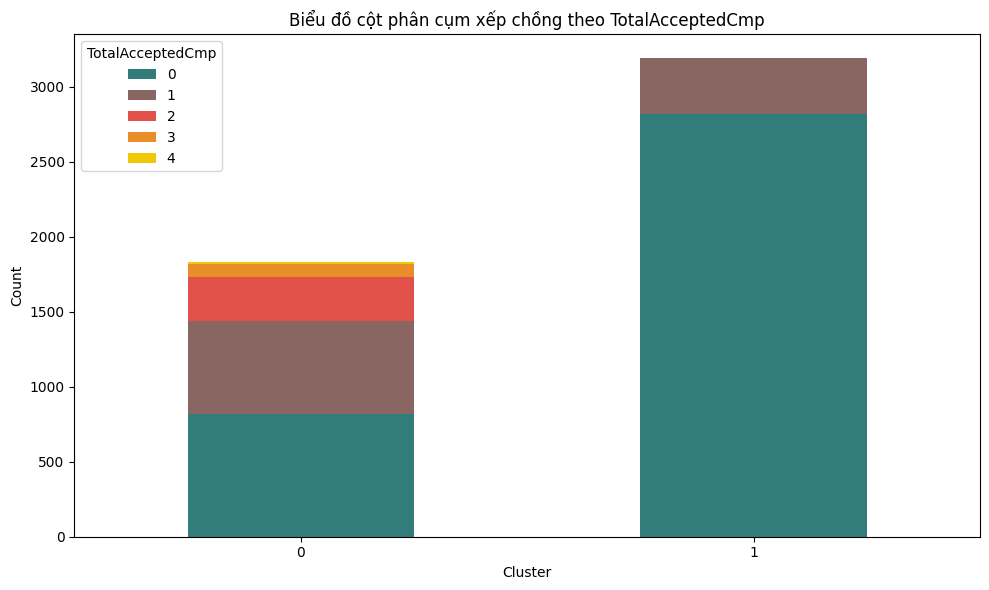

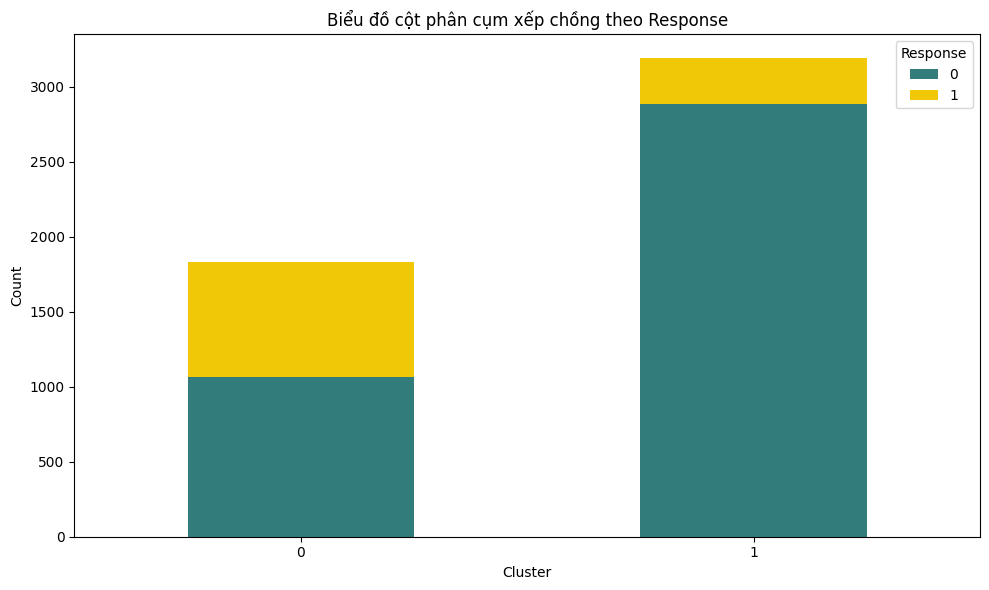

In [129]:
categorical_columns = ['Age_Group','TotalAcceptedCmp','Response']
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette)
for column in categorical_columns:
    # Prepare data
    data = df_clusters.groupby(['Cluster', column]).size().unstack().fillna(0)

    # Plot stacked bar chart
    data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap)

    plt.title(f'Biểu đồ cột phân cụm xếp chồng theo {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

💵 **Nhóm 0:**

- Nhóm thu nhập cao
- Thường là không có con
- Số lần mua hàng cao
- Chi phí cao
- Chấp nhận khuyến mại

🪙 **Nhóm 1:**
- Nhóm thu nhập trung bình và thấp
- Có nhiều hơn 1 con
- Chi phí thấp và số lần mua hàng ít
- Không chấp nhận khuyến mại


#Phân cụm kết hợp phân loại

In [130]:
!pip install lazypredict

In [131]:
from lazypredict.Supervised import LazyClassifier

X=df_clusters.drop('Cluster',axis=1)
y=df_clusters['Cluster']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Khởi tạo LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Sắp xếp kết quả theo độ chính xác giảm dần
sorted_models = models.sort_values(by='Accuracy', ascending=False)

print(sorted_models)

 97%|█████████▋| 30/31 [00:10<00:00,  4.77it/s]

[LightGBM] [Info] Number of positive: 2537, number of negative: 1478
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 4015, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.631880 -> initscore=0.540292
[LightGBM] [Info] Start training from score 0.540292


100%|██████████| 31/31 [00:10<00:00,  2.98it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    1.00               1.00     1.00      1.00   
SVC                                1.00               1.00     1.00      1.00   
LinearSVC                          1.00               1.00     1.00      1.00   
LogisticRegression                 1.00               1.00     1.00      1.00   
CalibratedClassifierCV             1.00               1.00     1.00      1.00   
SGDClassifier                      1.00               1.00     1.00      1.00   
PassiveAggressiveClassifier        1.00               1.00     1.00      1.00   
ExtraTreesClassifier               0.99               0.99     0.99      0.99   
XGBClassifier                      0.99               0.99     0.99      0.99   
KNeighborsClassifier               0.99               0.99     0.99      0.99   
LabelPropagation            

In [132]:

# Chuẩn hóa dữ liệu cho Logistic Regression
scaler_lr = StandardScaler()
X_train_scaled = scaler_lr.fit_transform(X_train.values)
X_test_scaled = scaler_lr.transform(X_test.values)

# Khởi tạo và huấn luyện mô hình Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred_lr = model_lr.predict(X_test_scaled)

# Các chỉ số đánh giá
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
print(f'Logistic Regression with Cluster - Accuracy: {accuracy_lr}')
print(f'Logistic Regression with Cluster - Precision: {precision_lr}')

Logistic Regression with Cluster - Accuracy: 0.99800796812749
Logistic Regression with Cluster - Precision: 1.0


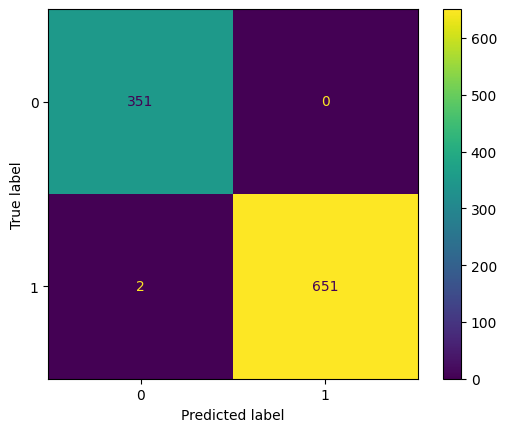

In [133]:
cm = confusion_matrix(y_test,y_pred_lr )
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#Đánh giá

In [134]:
from sklearn.model_selection import cross_val_score, KFold
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import make_scorer

def f1_weighted(y_actual, y_pred):
    return f1_score(y_actual, y_pred, average='weighted')

f1w_score = make_scorer(f1_weighted, greater_is_better=True)

def cross_val_model(X, y, models):

    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    results = []

    for model in models:
        kfold = KFold(n_splits=5, shuffle=True, random_state=42)
        f1 = cross_val_score(model, X, y, cv=kfold, scoring=f1w_score, verbose=1)
        print(type(model).__name__)
        print(f"CV F1 scores: {np.round(f1,3)}")
        print(f"Mean CV F1: {f1.mean():.3f}")
        print(f"CV F1 STDEV: {f1.std():.3f}")
        print(f"CV F1 Deviation: {f1.max() - f1.min():.3f}")
        print('============================================================')
modelss = [LogisticRegression()]
cross_val_model(X, y, modelss)

LogisticRegression
CV F1 scores: [0.96  0.941 0.956 0.944 0.94 ]
Mean CV F1: 0.948
CV F1 STDEV: 0.008
CV F1 Deviation: 0.020


In [135]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("F1 Score")

    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=kfold, n_jobs=n_jobs, train_sizes=train_sizes, scoring=f1w_score)
    print(train_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

[[0.97262817 0.95777973 0.97753583 0.97506234 0.97514008]
 [0.96320695 0.95632209 0.96858241 0.95486682 0.95709664]
 [0.95745299 0.96289064 0.95383512 0.95881046 0.95384321]
 [0.95567123 0.95633854 0.96852783 0.96562802 0.96724431]
 [0.96071778 0.94027647 0.96121984 0.94053689 0.96170855]]


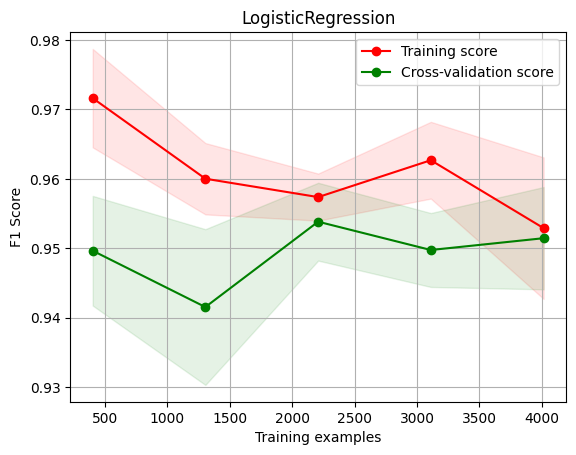

In [136]:
for model in modelss:
    plot_learning_curve(model, type(model).__name__, X, y, cv = 5)

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
logistic = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1','l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter':[100,200,300],
}

logistic_grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring=f1w_score, verbose=1)

logistic_grid_search.fit(X_train, y_train)

print("Best parameters found:")
print(logistic_grid_search.best_params_)

print("Best cross-validation F1 score: {:.2f}".format(logistic_grid_search.best_score_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:
{'C': 100, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation F1 score: 1.00
